<h1><font color="#FF00FF">Data Visualization: criação de gráficos com o Matplotlib

<font color='Teal'>Começaremos o curso criando um novo notebook Python, seja no Jupyter ou na plataforma de sua preferência. Nós trabalharemos com dados de uma estação de meteorologia, que registra informações como temperatura, pressão, umidade e assim por diante. Foi pedido um relatório que analisasse a temperatura ao longo do tempo a partir desses dados.

<h1><font color='ff00ff'>01 - Primeiras Vizualizações

In [1]:
import pandas as pd
df = pd.read_csv('./data/monitoramento_tempo.csv')

In [2]:
df.head(5)

temperatura  pressão  humidade  direção do vento  velocidade do vento  \
0   282.080000   1024.0      81.0               0.0                  0.0   
1   282.080000   1024.0      81.0               0.0                  0.0   
2   282.083252   1024.0      80.0               4.0                  0.0   
3   282.091866   1024.0      80.0              18.0                  0.0   
4   282.100481   1024.0      80.0              31.0                  0.0   

  dia_da_semana                 data  
0       Domingo  2012-10-01 12:00:00  
1       Domingo  2012-10-01 13:00:00  
2       Domingo  2012-10-01 14:00:00  
3       Domingo  2012-10-01 15:00:00  
4       Domingo  2012-10-01 16:00:00

<font color='Teal'>Note que temos as variáveis temperatura, pressão, humidade, direção do vento, velocidade do vento, dia_da_semana no qual as informações foram registradas e data do evento (contendo dia, mês, ano e hora).

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperatura          45253 non-null  float64
 1   pressão              45253 non-null  float64
 2   humidade             45253 non-null  float64
 3   direção do vento     45253 non-null  float64
 4   velocidade do vento  45253 non-null  float64
 5   dia_da_semana        45253 non-null  object 
 6   data                 45253 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.4+ MB


<font color='Teal'>Percebemos então que o conjunto consiste em mais de 45 mil linhas, nenhuma delas nula. Além disso, o campo data é do tipo object, que é interpretado pelo Python como uma string. Entretanto, é mais interessante para nós que a variável de data seja interpretada como o tipo datetime, o que nos ajudará na construção dos gráficos. Consertaremos esse ponto atribuindo à coluna df['data'] a conversão dessa mesma coluna no tipo desejado, algo que faremos usando a função to_datetime() do Pandas.

In [4]:
df.data = pd.to_datetime(df.data)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

<font color='Teal'>A ideia é plotarmos em um gráfico a variação de temperatura ao longo do tempo. Para isso, usaremos a função plot.plot() recebendo como parâmetros as colunas df['data'] e df['temperatura'], representando, respectivamente, o eixo x e o eixo y.

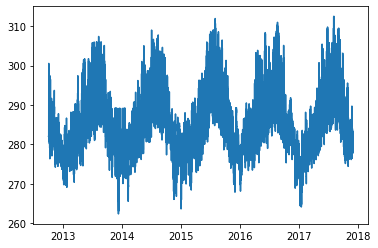

In [6]:
plt.plot(df.data, df.temperatura)

<font color='Teal'>Seria interessante aumentarmos a nossa visualização, algo que faremos usando a função plt.figure() com o parâmetro figsize, que define exatamente o tamanho da imagem. Nesse caso, passaremos a tupla 15,8, mas você pode alterar esses parâmetros a vontade. Feita essa configuração, plotaremos novamente o gráfico.

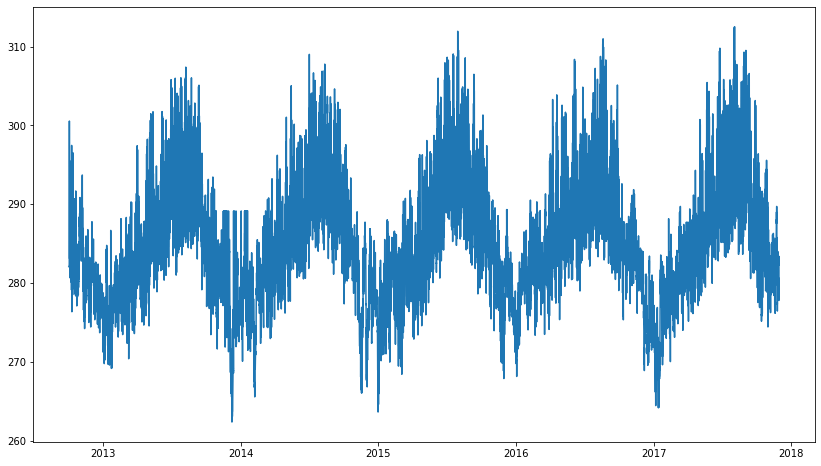

In [7]:
plt.figure(figsize=(14,8))
plt.plot(df.data, df.temperatura)

<font color='Teal'>Ainda é possível melhorarmos o gráfico de modo a torná-lo mais apresentável. Adicionaremos um título ("Temperatura no tempo") ao topo da visualização por meio da função plt.title(), que recebe como parâmetro uma string.

Text(0.5, 1.0, 'Temperatura e Tempo')

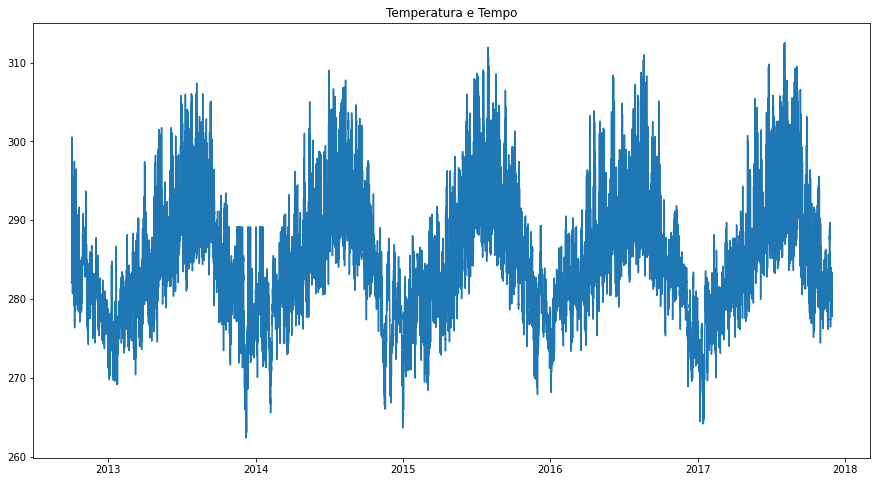

In [8]:
plt.figure(figsize=(15, 8))
plt.plot(df.data, df.temperatura)
plt.title('Temperatura e Tempo')

<h1><font color='ff00ff' size=6>Funcionalidades Básicas com matplotlib

<font color='Teal'>Pensando nisso, começaremos explorando algumas funcionalidades mais básicas. Criaremos uma variável fig que receberá a chamada de plt.figure(), função que cria uma nova figura. Ela receberá o parâmetro figsize, que vimos anteriormente, com os valores 15, 18. Com isso temos um objeto de figura.

Criaremos uma variável eixo recebendo a função fig.add_axes(), que nos permitirá adicionar os eixos x e y a nossa figura. Ela receberá como argumento uma lista contendo os pontos em que esse eixo será desenhado, nesse caso 0, 0, 1, 1.

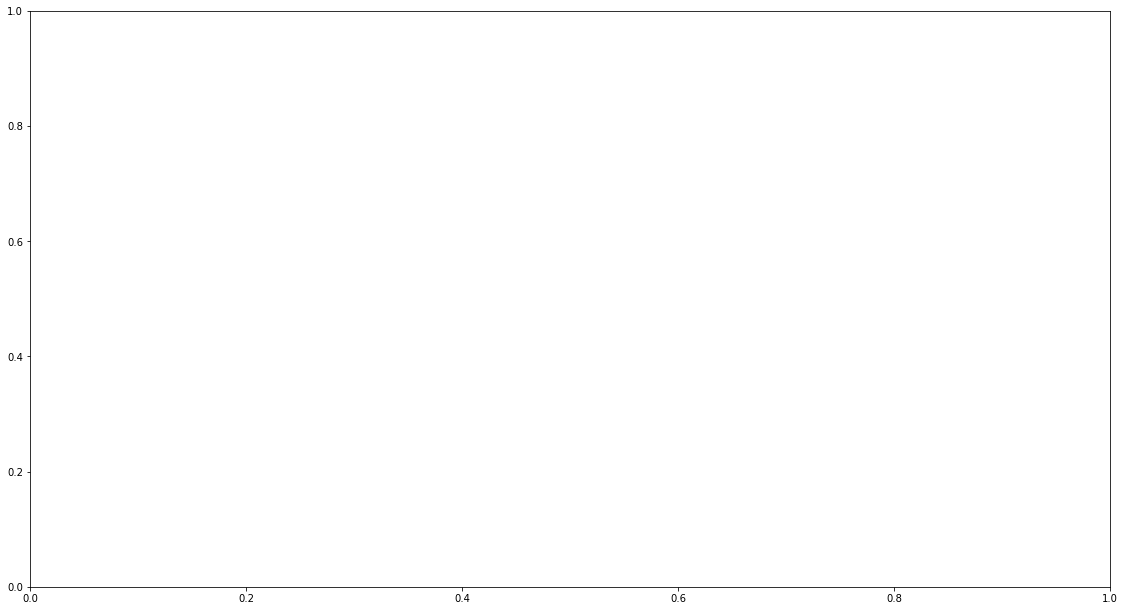

In [9]:
fig = plt.figure(figsize=(15, 8))
eixo = fig.add_axes([0, 0, 1, 1])
# O resultado será um gráfico vazio.

Text(0.5, 1.0, 'Temperatura no Momento')

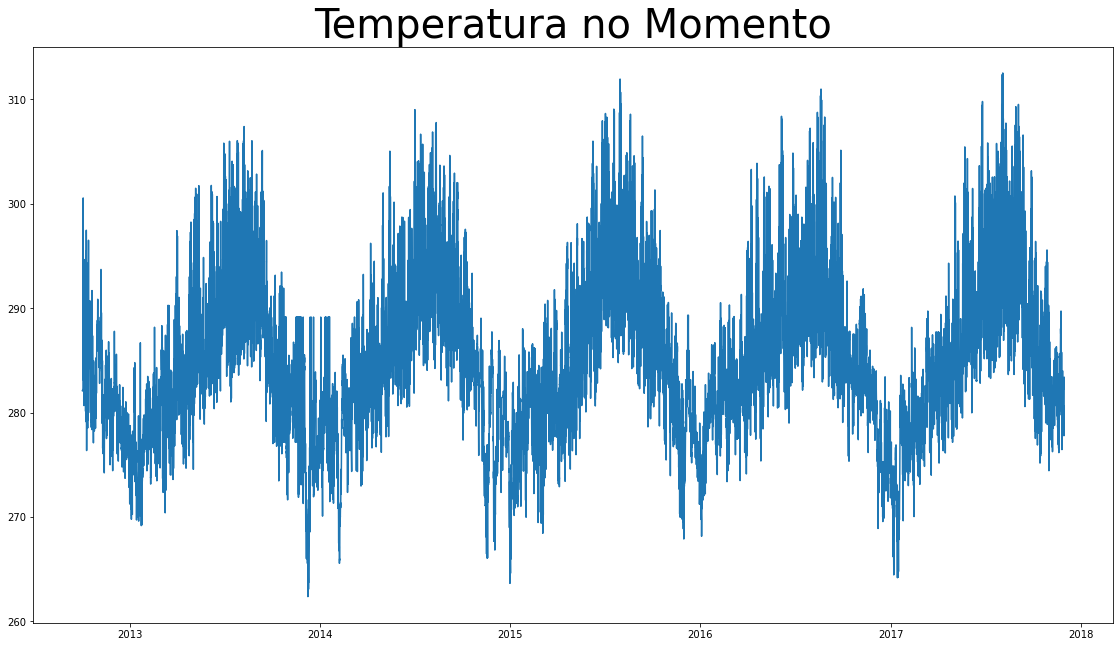

In [10]:
fig = plt.figure(figsize=(15, 8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(df.data, df.temperatura)
eixo.set_title('Temperatura no Momento', size=40)

<font color='Teal'>A maior diferença é que agora temos as variáveis fig e eixo, que possibilitarão algumas customizações mais avançadas no decorrer do curso. Note que ainda que tenhamos os dados de temperatura e tempo nos seus respectivos eixos, eles não estão identificados, o que pode dificultar uma primeira leitura. Pensando nisso, adicionaremos uma legenda identificando cada eixo.

Para incluirmos a legenda do eixo y, usaremos a função set_ylabel() passando a string "Temperatura". Repetiremos esse processo com set_xlabel(), dessa vez com a string "".

Text(0.5, 0, 'Data')

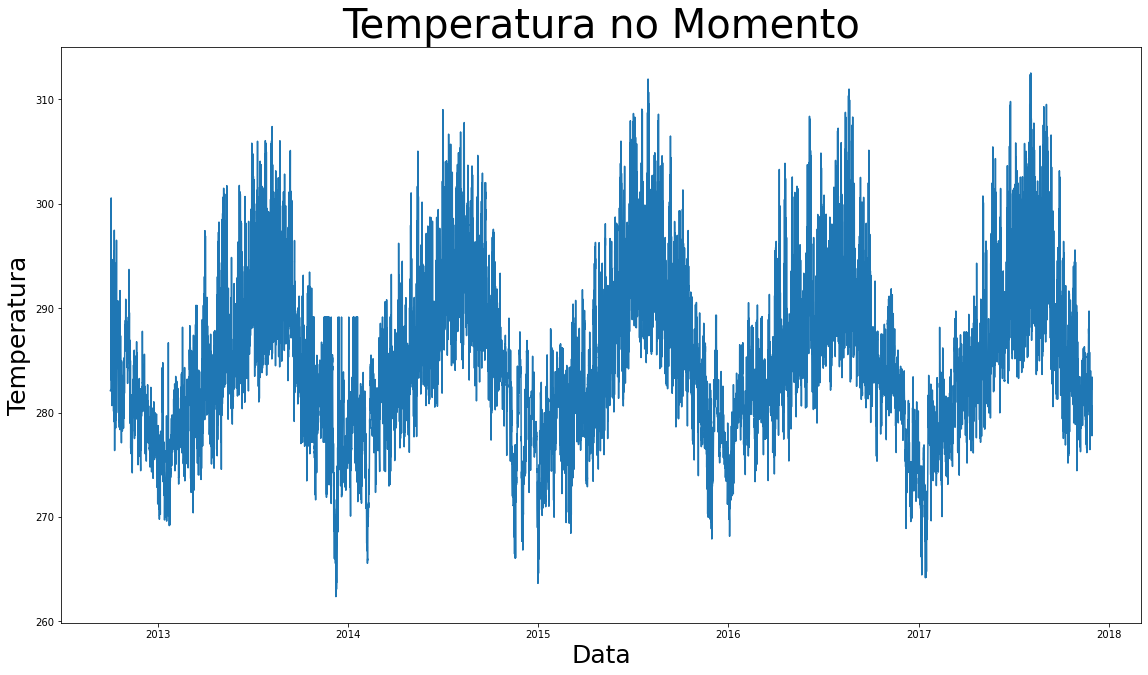

In [11]:
fig = plt.figure(figsize=(15, 8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(df.data, df.temperatura)
eixo.set_title('Temperatura no Momento', size=40)
eixo.set_ylabel('Temperatura', fontsize=25)
eixo.set_xlabel('Data', fontsize=25)

<ipython-input-12-6175eee4f23f>:7: MatplotlibDeprecationWarning: Unrecognized location 'lower light'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  eixo.legend(['Temperatura'], loc = 'lower light', fontsize=15)


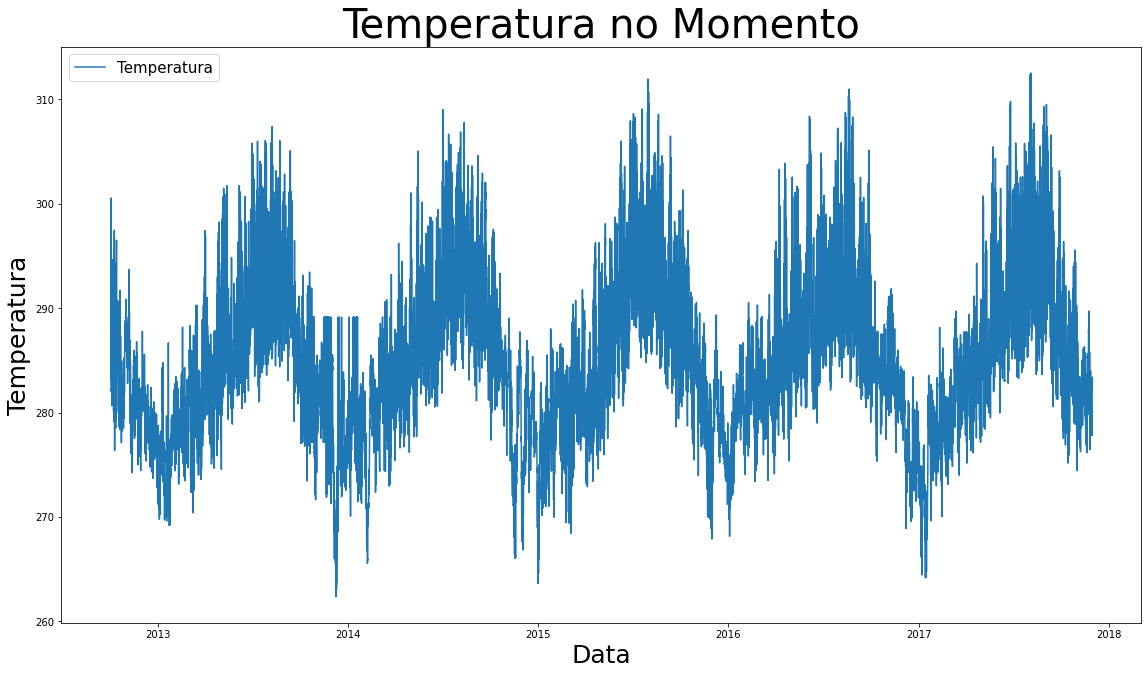

In [12]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(df.data, df.temperatura)
eixo.set_title('Temperatura no Momento', fontsize=40)
eixo.set_ylabel('Temperatura', fontsize=25)
eixo.set_xlabel('Data', fontsize=25)
eixo.legend(['Temperatura'], loc = 'lower light', fontsize=15)

<font color='Teal'>O Matplotlib também nos permite trocar a cor da plotagem do gráfico, substituindo o azul, que é o padrão em gráficos de linhas. Para isso, adicionaremos o argumento color à função eixo.plot(). Esse argumento recebe uma string com o nome da cor a ser escolhida, nesse caso "green" (verde).

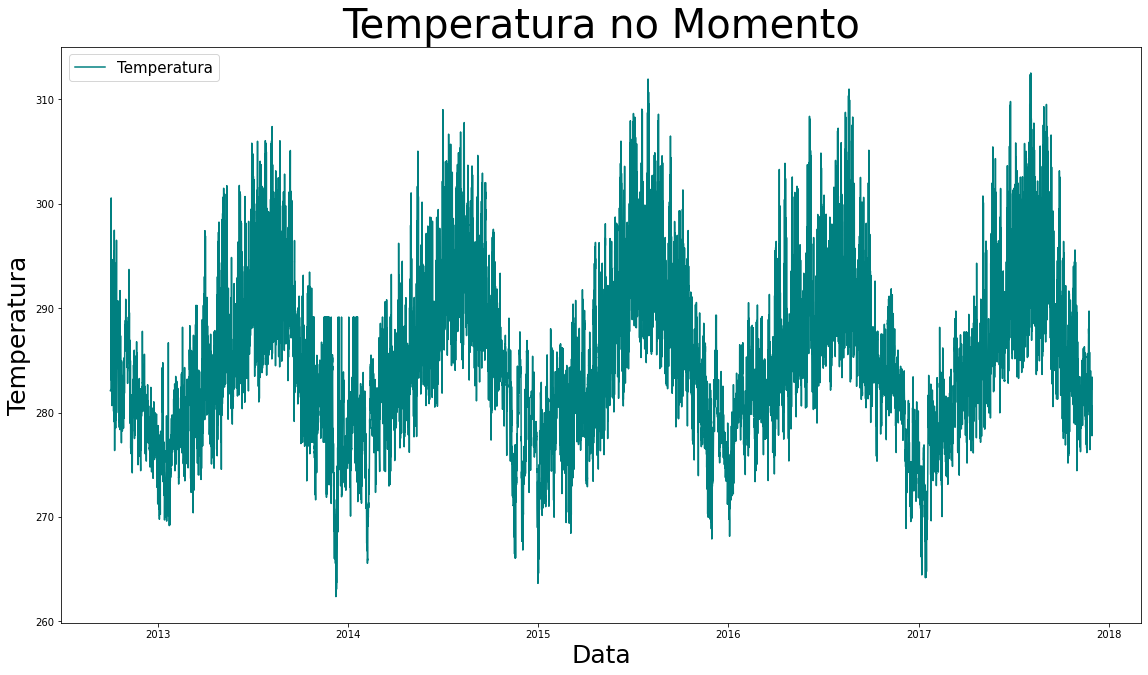

In [13]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(df.data, df.temperatura, color='Teal')
eixo.set_title('Temperatura no Momento', fontsize=40)
eixo.set_ylabel('Temperatura', fontsize=25)
eixo.set_xlabel('Data', fontsize=25)
eixo.legend(['Temperatura'], loc = 'upper left', fontsize=15)

<h1><font color='ff00ff'>02 - Customizando as Vizualizações

<font color='Teal'>Dentre as possibilidades, podemos, por exemplo, aumentar a espessura das linhas, o que é feito adicionando o argumento lw na função plot(). Para esse teste usaremos o valor lw = 4 (superior a 1, que é o padrão). Além disso, alteraremos a instrução color = 'green' para somente color = 'g' (abreviação de "green"), que o Matplotlib entenderá da mesma forma.

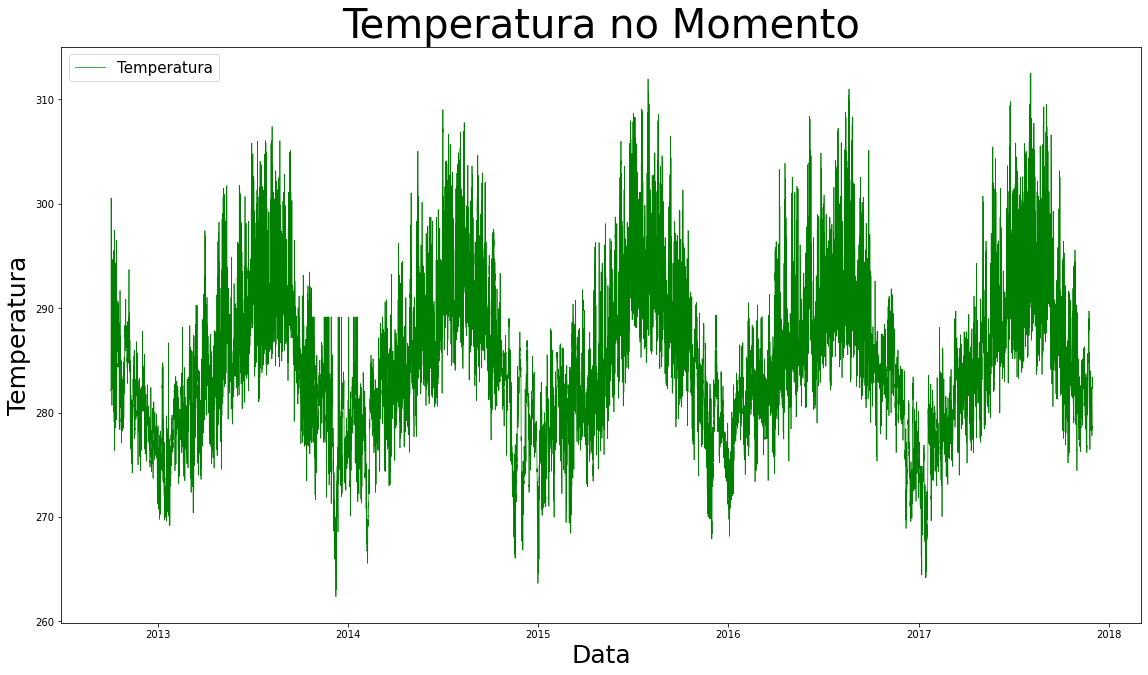

In [14]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(df.data, df.temperatura, color='g', lw=0.7)
eixo.set_title('Temperatura no Momento', fontsize=40)
eixo.set_ylabel('Temperatura', fontsize=25)
eixo.set_xlabel('Data', fontsize=25)
eixo.legend(['Temperatura'], loc = 'upper left', fontsize=15)

<font color='Teal'>Tendo percebido que alterar a espessura não nos é ideal, passaremos para outras alternativas. Uma possibilidade é mudarmos o estilo da plotagem - ao invés de termos linhas ligando cada ponto e formando nosso gráfico contínuo, usaremos o parâmetro ls = (de "line style", "estilo de linha" em inglês") recebendo o valor dotted ("pontilhado").

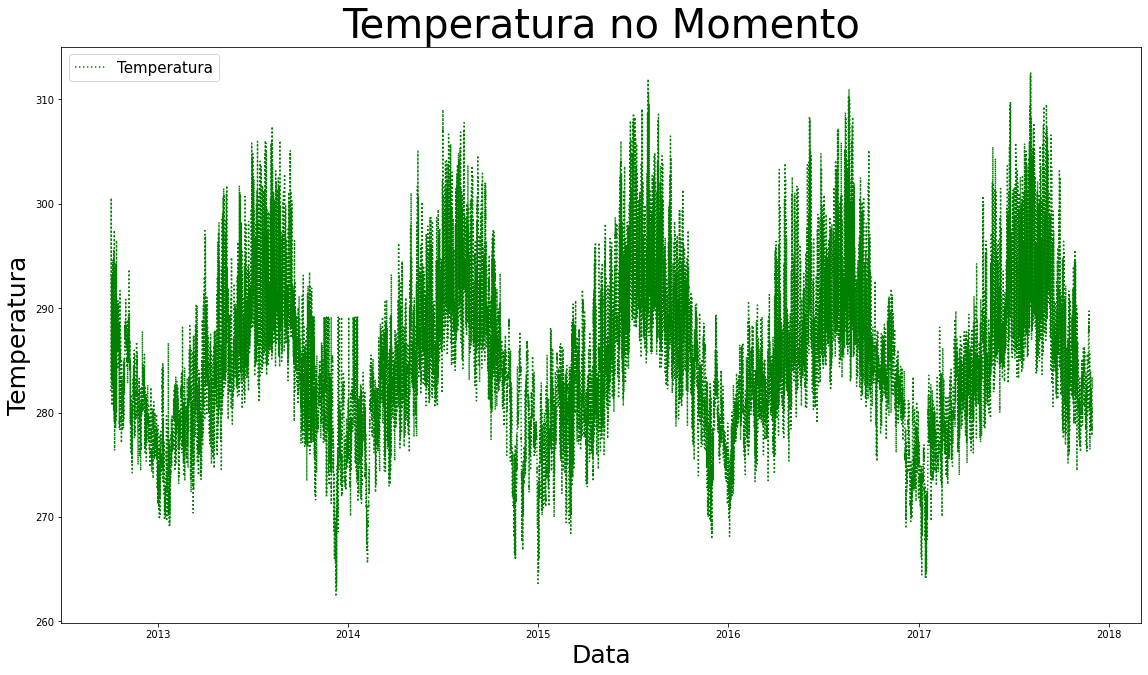

In [15]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(df.data, df.temperatura, color='g', ls='dotted')
eixo.set_title('Temperatura no Momento', fontsize=40)
eixo.set_ylabel('Temperatura', fontsize=25)
eixo.set_xlabel('Data', fontsize=25)
eixo.legend(['Temperatura'], loc = 'upper left', fontsize=15)

<font color='Teal'>Seria interessante se conseguíssemos enfatizar determinados períodos de tempo, por exemplo entre 2014 e 2015. Para isso, removeremos o estilo de linha adicionado anteriormente e usaremos a instrução eixo.set_xlim() para definirmos um limite no eixo X. Essa função recebe dois valores: o primeiro delimitando o limite inicial, e o segundo delimitando o limite final.

Como estamos trabalhando com um período de tempo, queremos definir um limite entre datas, o que traz a necessidade de um objeto do tipo datetime. Usaremos a função datetime.datime() para passarmos ambos os valores - o primeiro, 2014,1,1; e o segundo 2015,1,1. Esta função, por padrão, recebe os valores na ordem "ano, mês, dia", portanto estamos delimitando o período entre 1° de janeiro de 2014 e 1° de janeiro de 2015.

In [16]:
import datetime

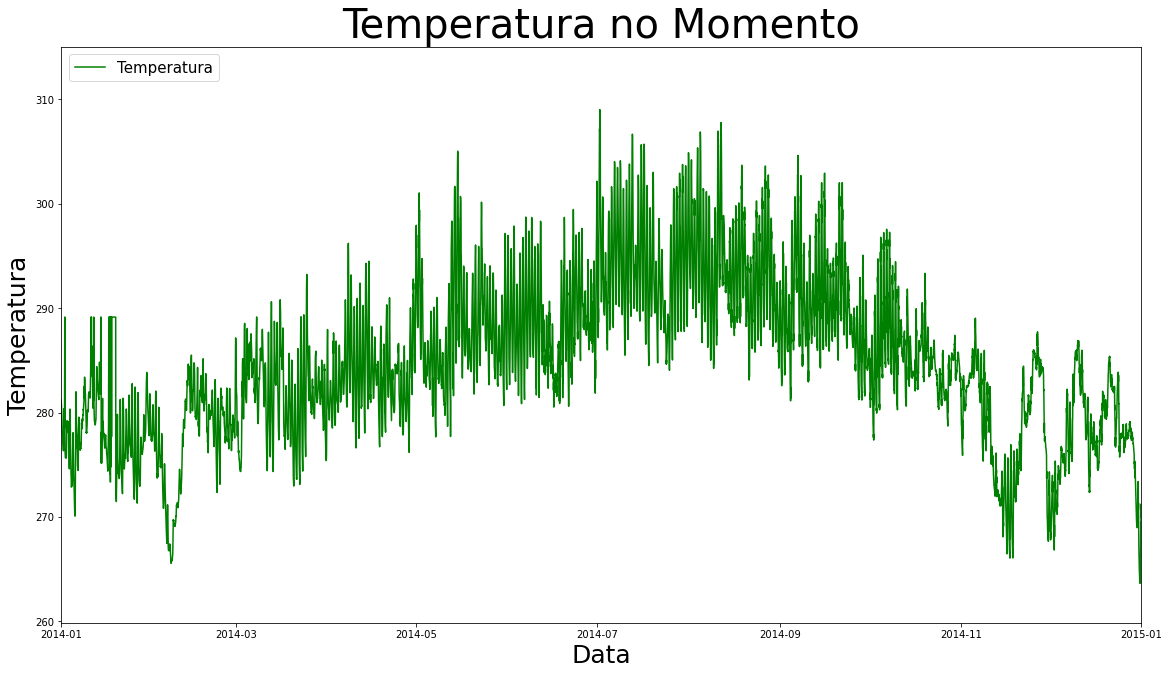

In [17]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(df.data, df.temperatura, color='g')
eixo.set_xlim(datetime.datetime(2014,1,1), datetime.datetime(2015,1,1))
eixo.set_title('Temperatura no Momento', fontsize=40)
eixo.set_ylabel('Temperatura', fontsize=25)
eixo.set_xlabel('Data', fontsize=25)
eixo.legend(['Temperatura'], loc = 'upper left', fontsize=15)

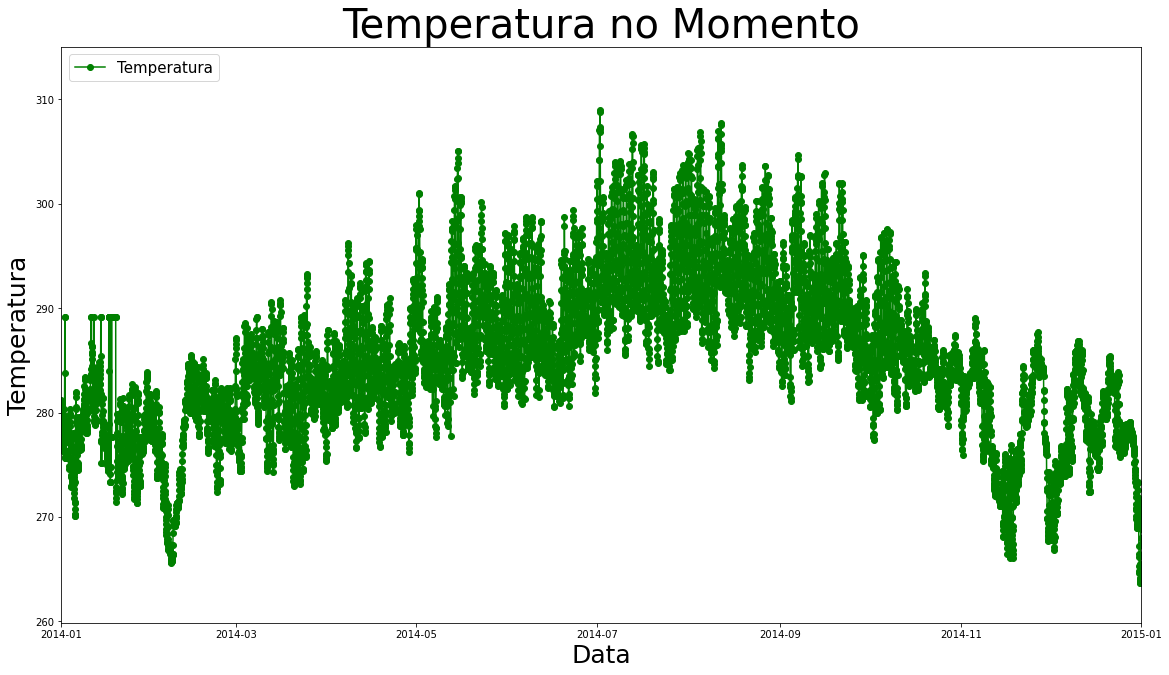

In [18]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(df.data, df.temperatura, color='g', marker = 'o')
eixo.set_xlim(datetime.datetime(2014,1,1), datetime.datetime(2015,1,1))
eixo.set_title('Temperatura no Momento', fontsize=40)
eixo.set_ylabel('Temperatura', fontsize=25)
eixo.set_xlabel('Data', fontsize=25)
eixo.legend(['Temperatura'], loc = 'upper left', fontsize=15)

<font color='Teal'>Ainda que seja interesante observarmos os pontos que formam o gráfico, essa visualização não parece nos trazer nenhuma vantagem - pelo contrário, temos muitas informações sobrepostas. Sendo assim, removeremos o marcador.

Uma customização que pode nos ser interessante é a adição de uma grade ("grid" no inglês) que nos desse uma impressão de continuidade, algo que faz sentido quando pensamos no decorrer de um ano. Para isso, usaremos a instrução eixo.grid() recebendo o valor True.

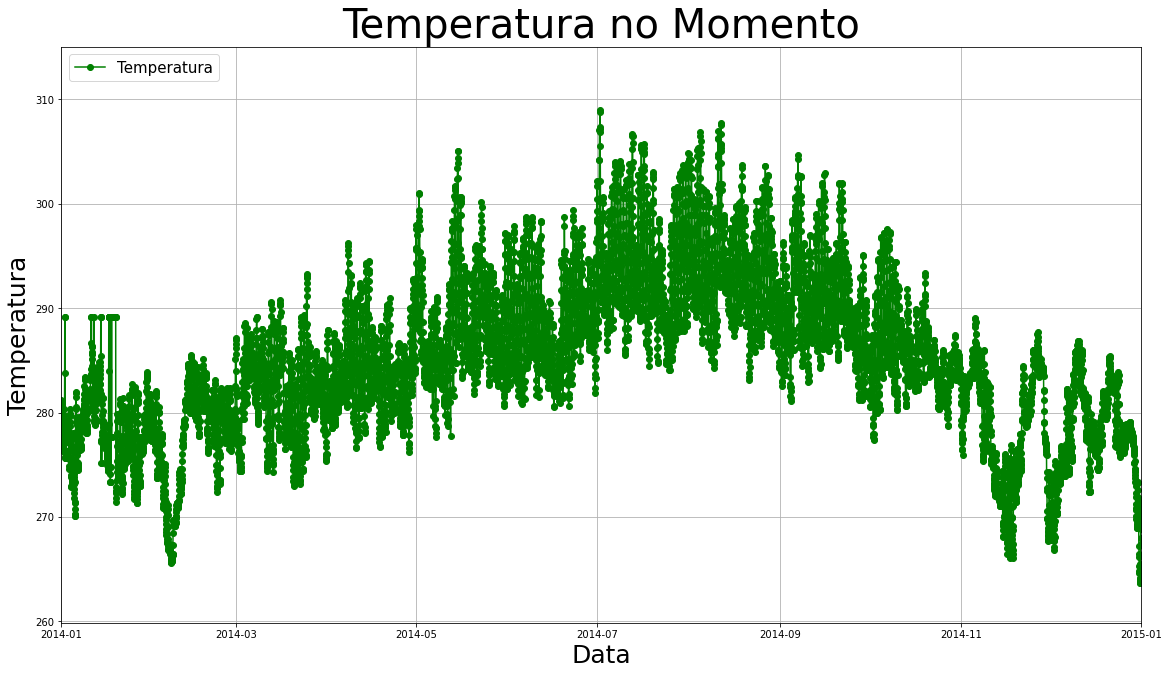

In [19]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(df.data, df.temperatura, color='g', marker = 'o')
eixo.set_xlim(datetime.datetime(2014,1,1), datetime.datetime(2015,1,1))
eixo.set_title('Temperatura no Momento', fontsize=40)
eixo.set_ylabel('Temperatura', fontsize=25)
eixo.set_xlabel('Data', fontsize=25)
eixo.legend(['Temperatura'], loc = 'upper left', fontsize=15)
eixo.grid(True)

Text(0.5, 1.0, 'Temperatura no momento')

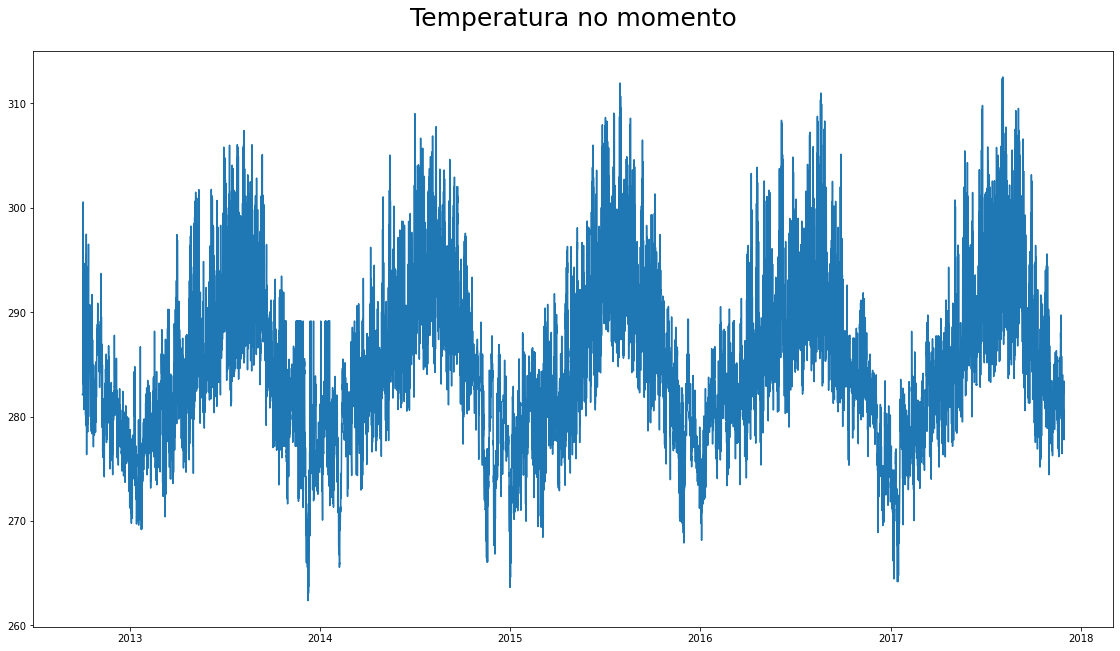

In [20]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(df.data, df.temperatura)
eixo.set_title('Temperatura no momento', fontsize=25, pad=25)

<font color='teal'>A maior diferença é que agora temos as variáveis fig e eixo, que possibilitarão algumas customizações mais avançadas no decorrer do curso. Note que ainda que tenhamos os dados de temperatura e tempo nos seus respectivos eixos, eles não estão identificados, o que pode dificultar uma primeira leitura. Pensando nisso, adicionaremos uma legenda identificando cada eixo.

Para incluirmos a legenda do eixo y, usaremos a função set_ylabel() passando a string "Temperatura". Repetiremos esse processo com set_xlabel(), dessa vez com a string "".

Text(0.5, 0, 'Data')

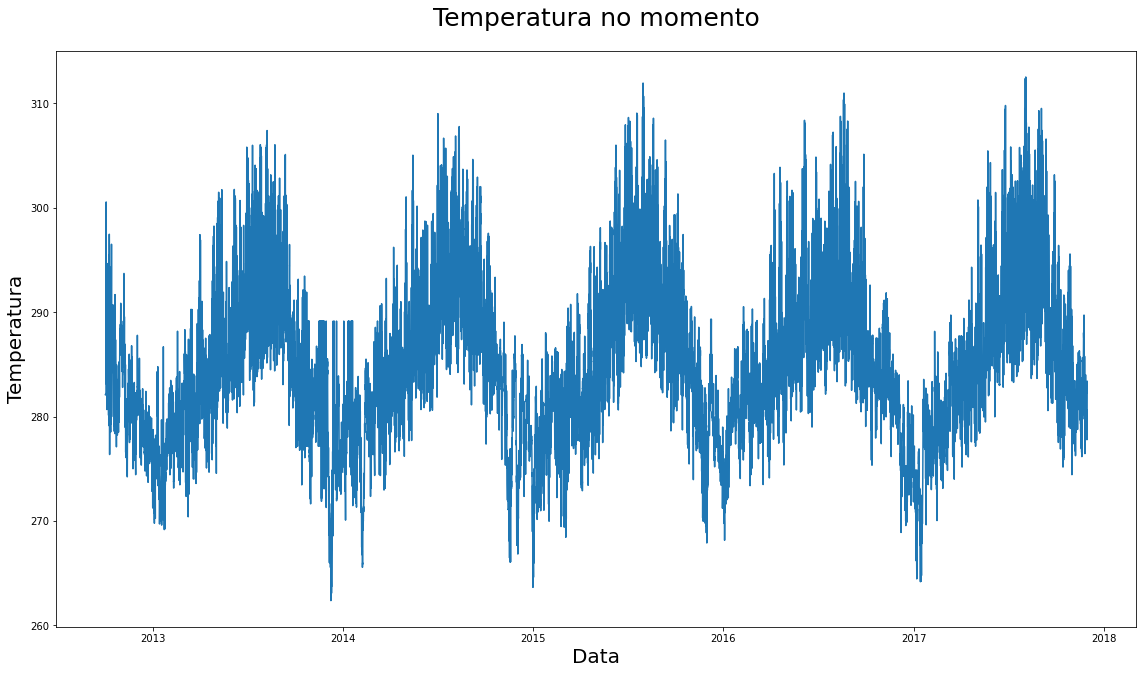

In [21]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(df.data, df.temperatura)
eixo.set_title('Temperatura no momento', fontsize=25, pad=25)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.set_xlabel('Data', fontsize=20)

Text(0.5, 0, 'Data')

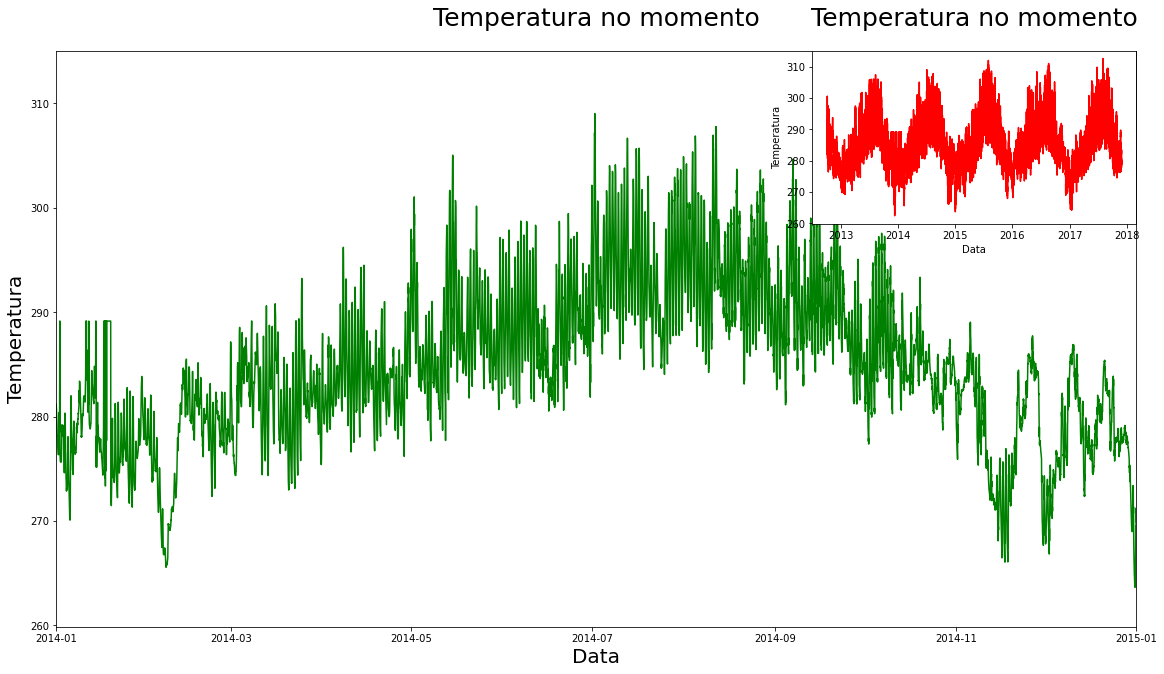

In [22]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(df.data, df.temperatura, color='g')
eixo.set_xlim(datetime.datetime(2014,1,1), datetime.datetime(2015,1,1))
eixo.set_title('Temperatura no momento', fontsize=25, pad=25)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.set_xlabel('Data', fontsize=20)

eixo2 = fig.add_axes([0.7, 0.7, 0.3, 0.3])
eixo2.plot(df.data, df.temperatura, color='red')
eixo2.set_title('Temperatura no momento', fontsize=25, pad=25)
eixo2.set_ylabel('Temperatura', fontsize=10)
eixo2.set_xlabel('Data', fontsize=10)

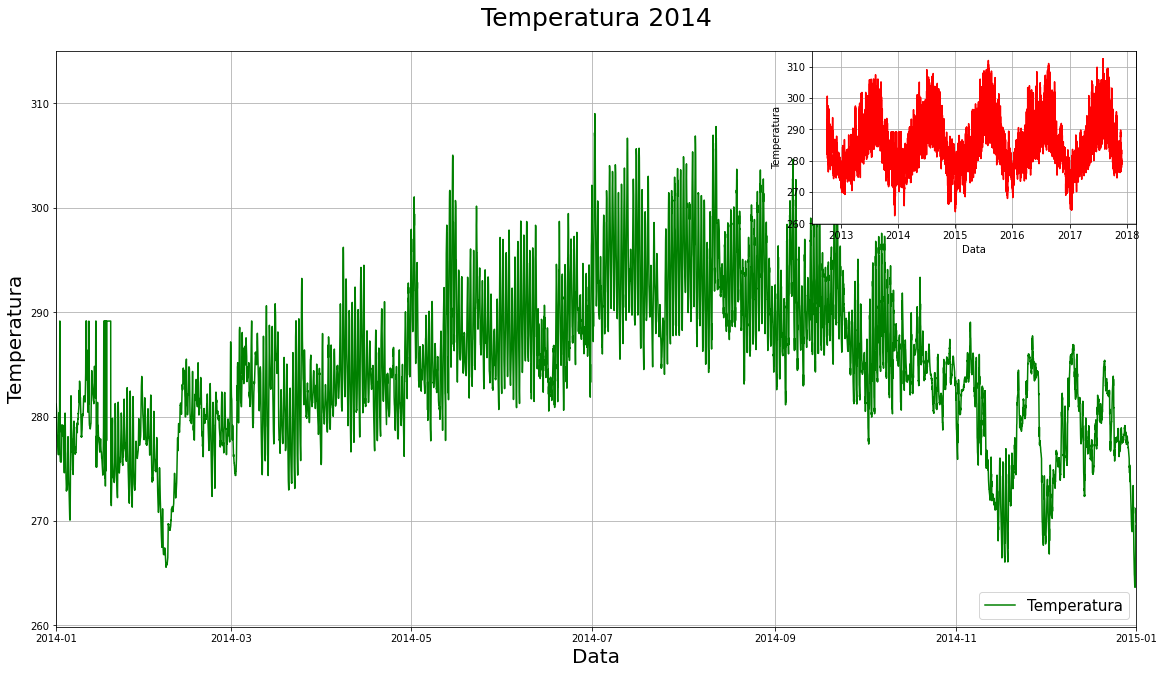

In [23]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(df.data, df.temperatura, color='g')
eixo.set_xlim(datetime.datetime(2014,1,1), datetime.datetime(2015,1,1))
eixo.set_title('Temperatura 2014', fontsize=25, pad=25)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.set_xlabel('Data', fontsize=20)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize=15)
eixo.grid(True)

eixo2 = fig.add_axes([0.7, 0.7, 0.3, 0.3])
eixo2.plot(df.data, df.temperatura, color='red')
eixo2.set_ylabel('Temperatura', fontsize=10)
eixo2.set_xlabel('Data', fontsize=10)
eixo2.grid(True)

<font color='teal'>Para substituirmos essas visualizações, precisaremos alterar o limite em eixo.set_xlim() para o mês de maio de 2014, que conseguiremos com datetime.datetime(2014,5,1), definindo o primeiro dia desse mês como ponto inicial, e datetime.datetime(2014,6,1), definindo o final do gráfico como o primeiro dia do mês seguinte junho.

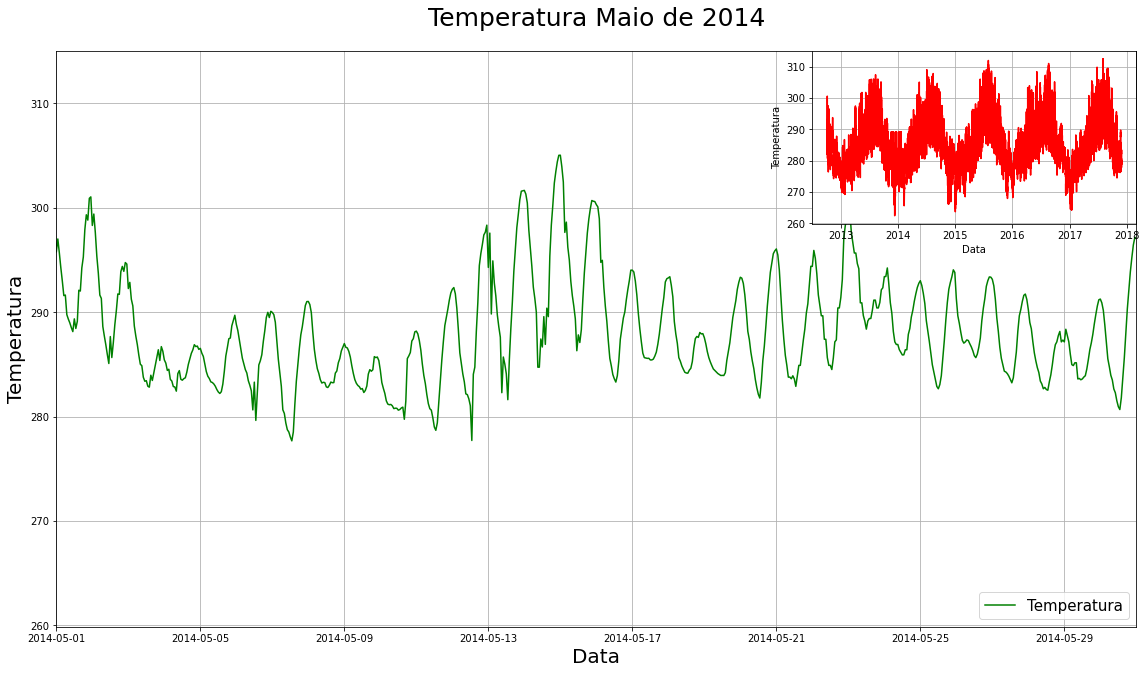

In [24]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.plot(df.data, df.temperatura, color='g')
eixo.set_xlim(datetime.datetime(2014,5,1), datetime.datetime(2014,5,31))
eixo.set_title('Temperatura Maio de 2014', fontsize=25, pad=25)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.set_xlabel('Data', fontsize=20)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize=15)
eixo.grid(True)

eixo2 = fig.add_axes([0.7, 0.7, 0.3, 0.3])
eixo2.plot(df.data, df.temperatura, color='red')
eixo2.set_ylabel('Temperatura', fontsize=10)
eixo2.set_xlabel('Data', fontsize=10)
eixo2.grid(True)

Text(0.5, 0, 'Data')

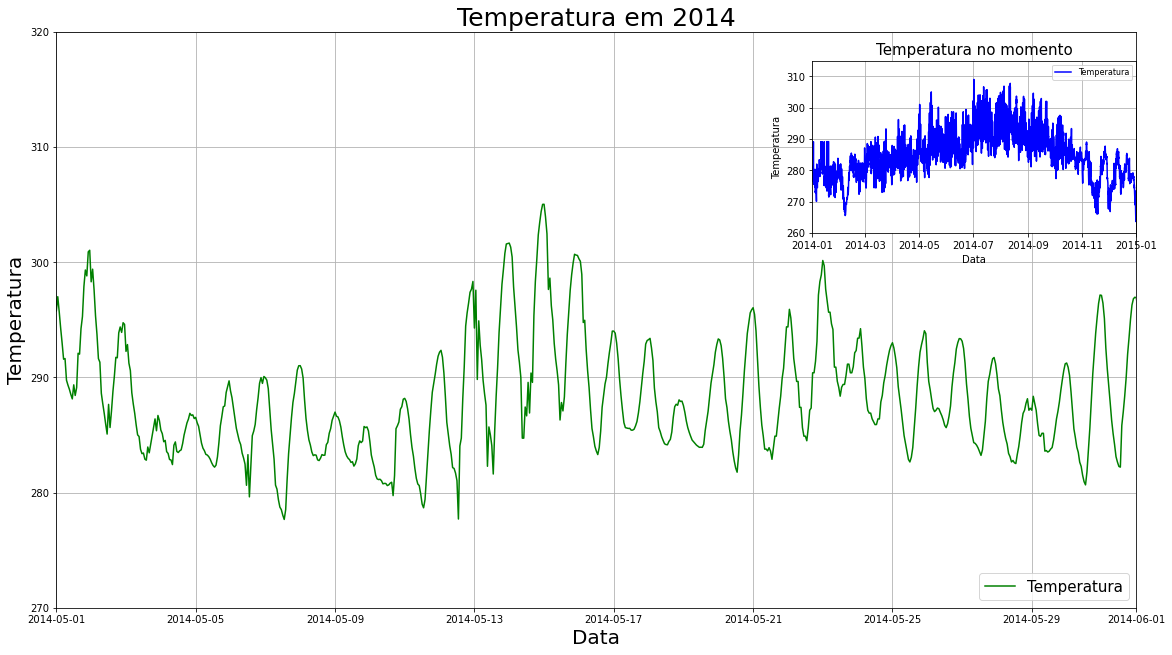

In [25]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])
eixo2 = fig.add_axes([0.7,0.65,0.3,0.3])

eixo.grid(True)
eixo.plot(df['data'], df['temperatura'], color = 'g')
eixo.set_xlim(datetime.datetime(2014,5,1),datetime.datetime(2014,6,1))
eixo.set_ylim(270, 320)
eixo.set_title('Temperatura em 2014', fontsize=25)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize=15)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.set_xlabel('Data', fontsize=20)

eixo2.grid(True)
eixo2.plot(df['data'], df['temperatura'], color = 'b')
eixo2.set_xlim(datetime.datetime(2014,1,1),datetime.datetime(2015,1,1))
eixo2.set_title('Temperatura no momento', fontsize=15)
eixo2.legend(['Temperatura'], loc = 'best', fontsize=8)
eixo2.set_ylabel('Temperatura', fontsize=10)
eixo2.set_xlabel('Data', fontsize=10)

Text(0.5, 0, 'Data')

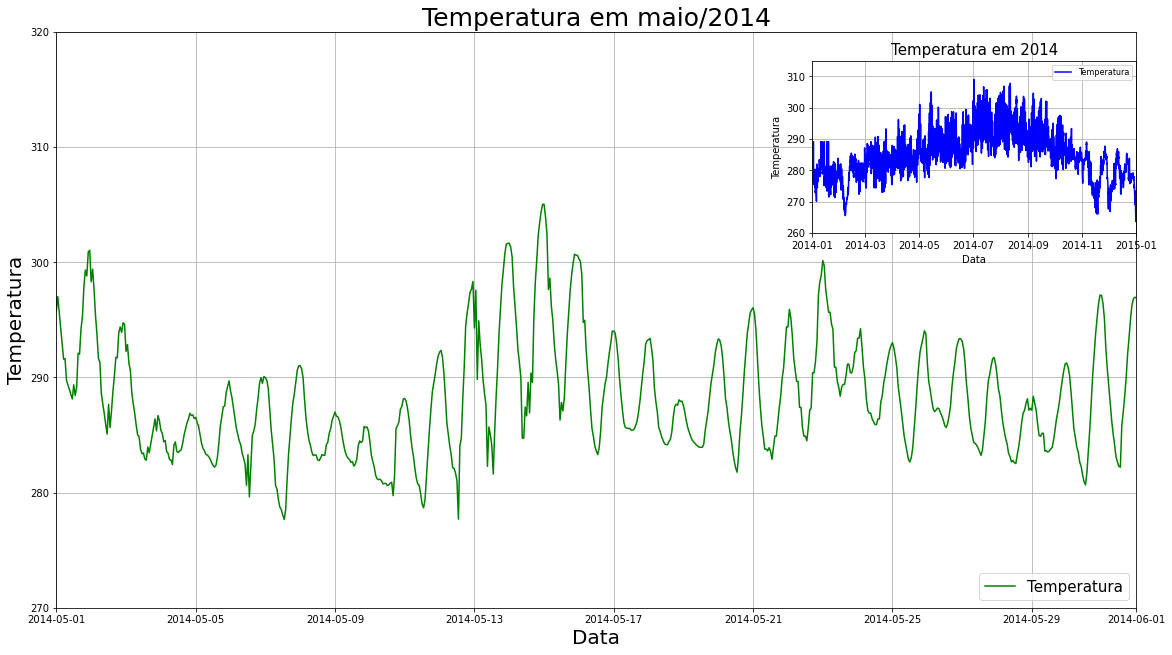

In [26]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])
eixo2 = fig.add_axes([0.7,0.65,0.3,0.3])

eixo.grid(True)
eixo.plot(df['data'], df['temperatura'], color = 'g')
eixo.set_xlim(datetime.datetime(2014,5,1),datetime.datetime(2014,6,1))
eixo.set_ylim(270, 320)
eixo.set_title('Temperatura em maio/2014', fontsize=25)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize=15)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.set_xlabel('Data', fontsize=20)

eixo2.grid(True)
eixo2.plot(df['data'], df['temperatura'], color = 'b')
eixo2.set_xlim(datetime.datetime(2014,1,1),datetime.datetime(2015,1,1))
eixo2.set_title('Temperatura em 2014', fontsize=15)
eixo2.legend(['Temperatura'], loc = 'best', fontsize=8)
eixo2.set_ylabel('Temperatura', fontsize=10)
eixo2.set_xlabel('Data', fontsize=10)

<font color='teal'>Outro ajuste interessante seria realçarmos em verde, na visualização menor, as temperaturas do mês de maio, gerando uma associação cromática entre os dois gráficos. A ideia é aplicarmos um filtro que corresponda somente à área desejada do gráfico.

Na prática, substituiremos a cor original da visualização menor (eixo2) para g, ou seja, verde. Em seguida, criaremos dois filtros: azul_esquerda, que corresponde ao período anterior ao mês de maio; e azul_direita, correspondendo ao período posterior a tal mês. Usaremos esses filtros para sobrepor, com a cor azul, os períodos selecionados.

Para obtermos esses valores, usaremos df['data'] < datetime.datetime(2014,5,1), pegando todos os valores da coluna data anteriores ao primeiro dia de maio, e df['data'] > datetime.datetime(2014,6,1) pegando os valores posteriores ao primeiro dia de junho.

In [27]:
azul_esquerda = df['data'] < datetime.datetime(2014,5,1)
azul_direita = df['data'] > datetime.datetime(2014,6,1)

eixo2.grid(True)
eixo2.plot(df['data'], df['temperatura'], color = 'g')
eixo2.set_xlim(datetime.datetime(2014,1,1),datetime.datetime(2015,1,1))
eixo2.set_title('Temperatura em 2014', fontsize=15)
eixo2.legend(['Temperatura'], loc = 'best', fontsize=8)
eixo2.set_ylabel('Temperatura', fontsize=10)
eixo2.set_xlabel('Data', fontsize=10)

Text(0.5, 400.6, 'Data')

In [28]:
azul_esquerda = df['data'] < datetime.datetime(2014,5,1)
azul_direita = df['data'] > datetime.datetime(2014,6,1)


eixo2.grid(True)
eixo2.plot(df['data'], df['temperatura'], color = 'g')
eixo2.plot(df[azul_esquerda]['data'], df[azul_esquerda]['temperatura'], color = 'b')
eixo2.plot(df[azul_direita]['data'], df[azul_direita]['temperatura'], color = 'b')

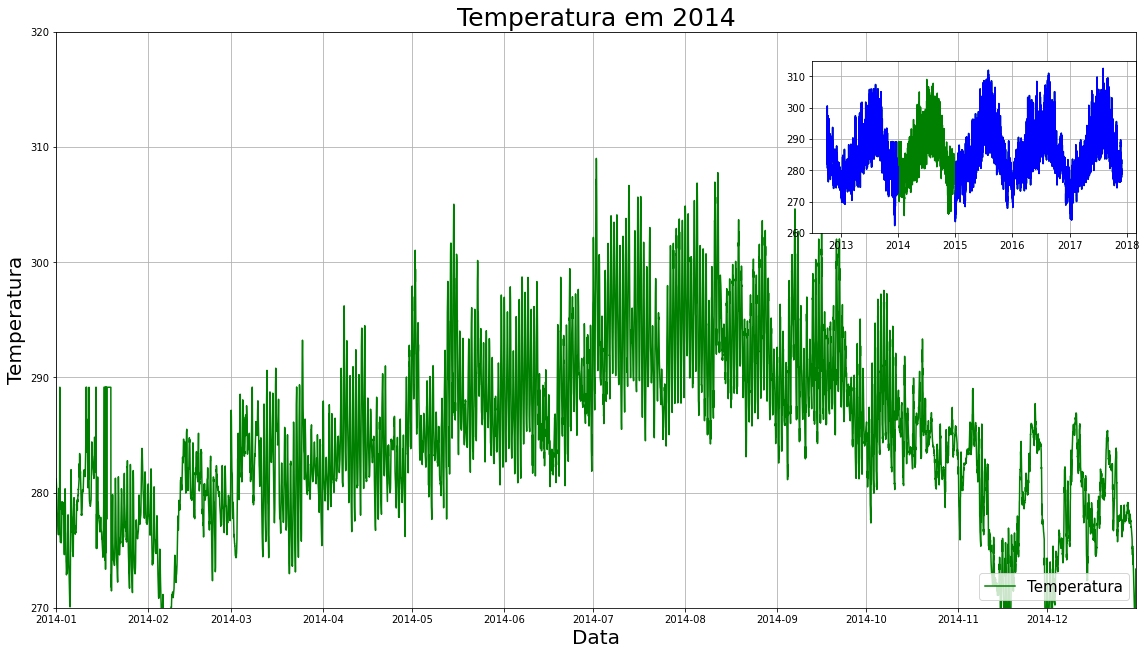

In [29]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])
eixo2 = fig.add_axes([0.7,0.65,0.3,0.3])

eixo.grid(True)
eixo.plot(df.data, df.temperatura, color = 'g')
eixo.set_xlim(datetime.datetime(2014,1,1),datetime.datetime(2014,12,31))
eixo.set_ylim(270, 320)
eixo.set_title('Temperatura em 2014', fontsize=25)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize=15)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.set_xlabel('Data', fontsize=20)

azul_esquerda = df['data'] < datetime.datetime(2014,1,1)
azul_direita = df['data'] > datetime.datetime(2014,12,31)


eixo2.grid(True)
eixo2.plot(df['data'], df['temperatura'], color = 'g')
eixo2.plot(df[azul_esquerda]['data'], df[azul_esquerda]['temperatura'], color = 'b')
eixo2.plot(df[azul_direita]['data'], df[azul_direita]['temperatura'], color = 'b')

Text(0.5, 1.0, 'Temperatura 2012-2018')

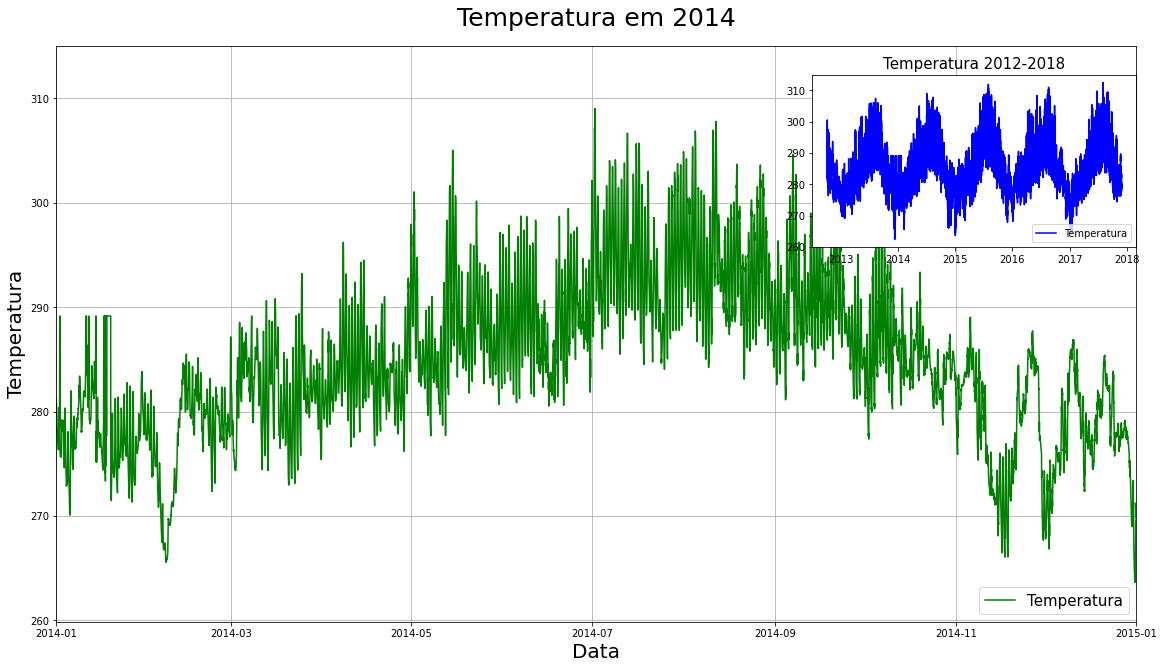

In [30]:
fig = plt.figure(figsize=(15,8))

eixo = fig.add_axes([0,0,1,1])
eixo2 = fig.add_axes([0.7,0.65,0.3,0.3])

eixo.grid(True)
eixo.plot(df['data'], df['temperatura'], color = 'g')
eixo.set_xlim(datetime.datetime(2014,1,1), datetime.datetime(2015,1,1))
eixo.set_title('Temperatura em 2014', fontsize=25, pad = 20)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.set_xlabel('Data', fontsize=20)
eixo.legend(['Temperatura'], loc = 'lower right', fontsize= 15)

eixo2.plot(df['data'], df['temperatura'], color = 'b')
eixo2.legend(['Temperatura'], loc = 'lower right') 
eixo2.set_title('Temperatura 2012-2018', fontsize=15)

<font color='teal'>Já fizemos um gráfico de toda a série histórica dos dados anteriormente, mas, para nos acostumarmos com a sintaxe, vamos refazê-lo do zero. Iniciaremos o processo com um objeto fig que receberá a função plt.figure() com o parâmetro figsize = (15,8), uma tupla indicando o tamanho da nossa figura

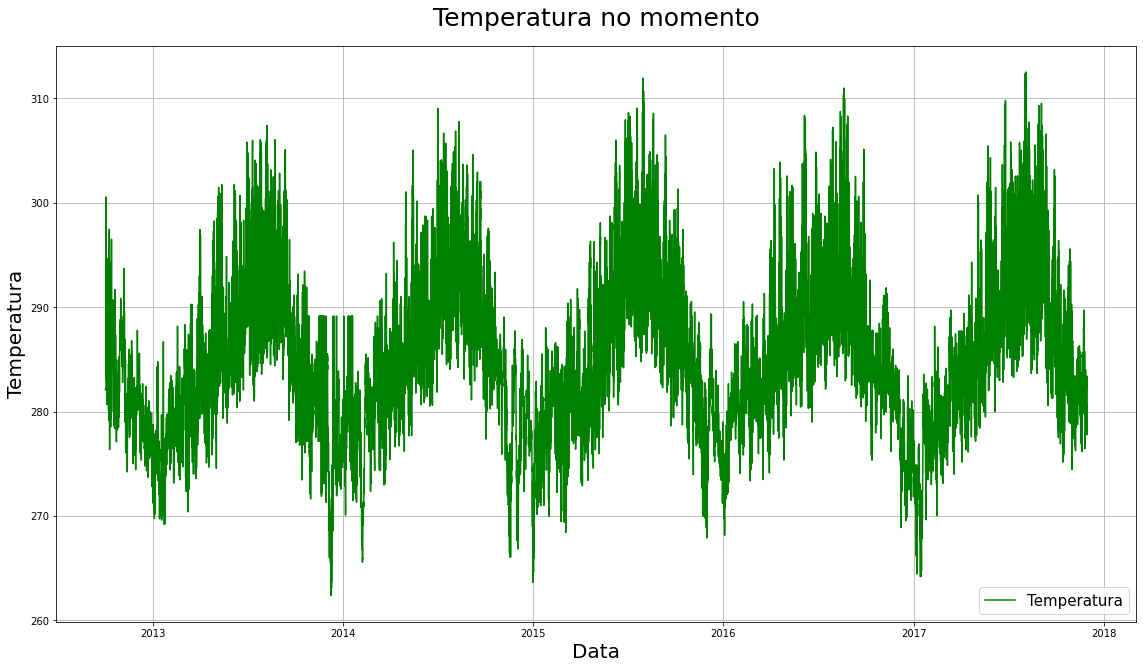

In [31]:
fig = plt.figure(figsize = (15,8))
eixo = fig.add_axes([0,0,1,1])
eixo.plot(df['data'], df['temperatura'], color = 'g')
eixo.set_title('Temperatura no momento', fontsize = 25, pad = 20)
eixo.set_xlabel('Data', fontsize=20)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.legend(['Temperatura'], loc='lower right', fontsize=15)
eixo.grid(True)

<font color='teal'>A ideia agora é limitarmos o ponto máximo e o ponto mínimo utilizando barras. Para isso, usaremos eixo.axhline(), uma função que nos permitirá gerar uma linha no eixo horizontal (horizontal line). Como parâmetros, passaremos primeiramente max() - uma função que nos retorna o valor máximo em determinado conjunto de dados - recebendo como parâmetro df['Temperatura']', seguida de color = 'k' para definirmos que nossa linha terá a cor preta, e linestyle = '--', definindo o estilo tracejado para tal linha.

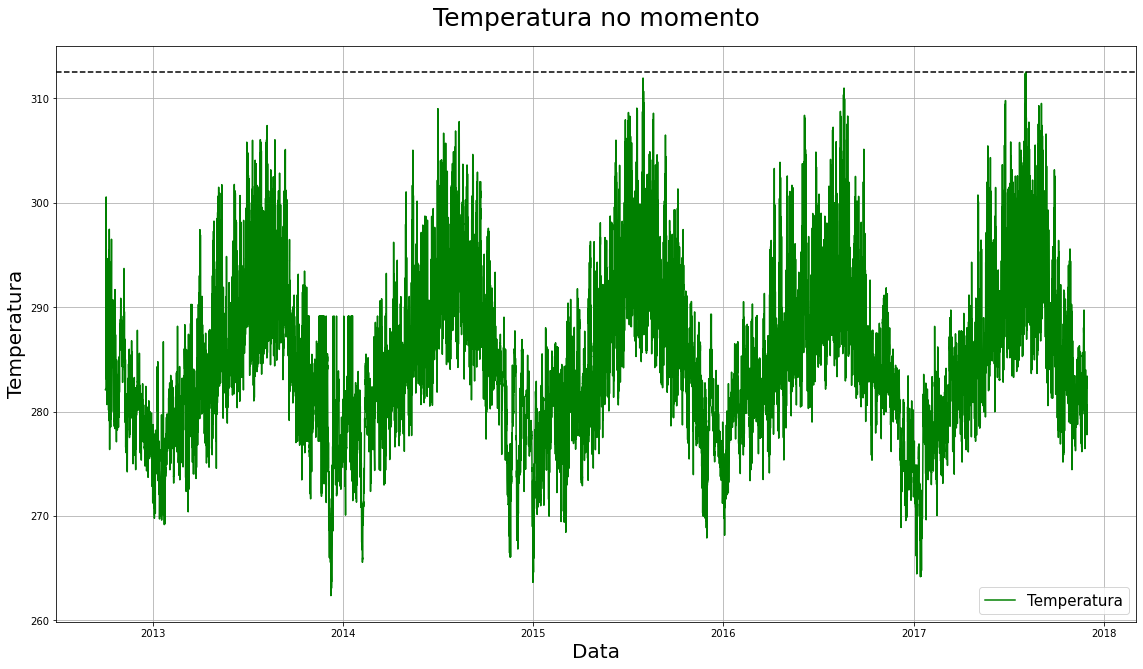

In [32]:
fig = plt.figure(figsize = (15,8))
eixo = fig.add_axes([0,0,1,1])
eixo.plot(df['data'], df['temperatura'], color = 'g')
eixo.set_title('Temperatura no momento', fontsize = 25, pad = 20)
eixo.set_xlabel('Data', fontsize=20)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.legend(['Temperatura'], loc='lower right', fontsize=15)
eixo.grid(True)
eixo.axhline(max(df['temperatura']), color = 'k', linestyle='--')

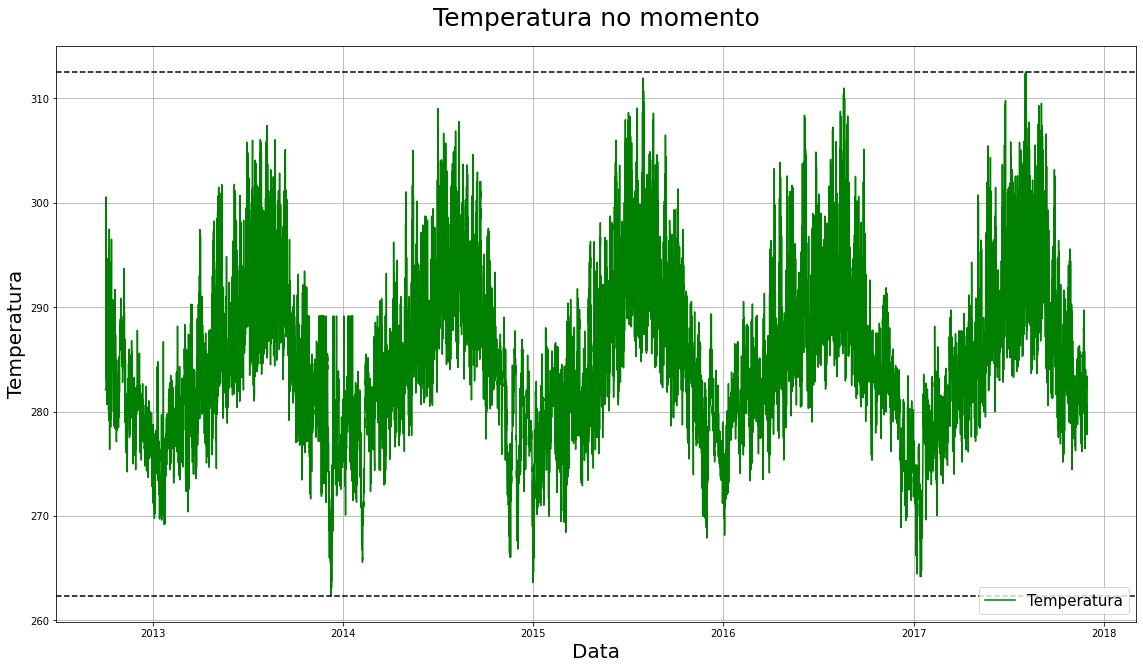

In [33]:
fig = plt.figure(figsize = (15,8))
eixo = fig.add_axes([0,0,1,1])
eixo.plot(df['data'], df['temperatura'], color = 'g')
eixo.set_title('Temperatura no momento', fontsize = 25, pad = 20)
eixo.set_xlabel('Data', fontsize=20)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.legend(['Temperatura'], loc='lower right', fontsize=15)
eixo.grid(True)
eixo.axhline(max(df['temperatura']), color = 'k', linestyle='--')
eixo.axhline(min(df['temperatura']), color = 'k', linestyle='--')

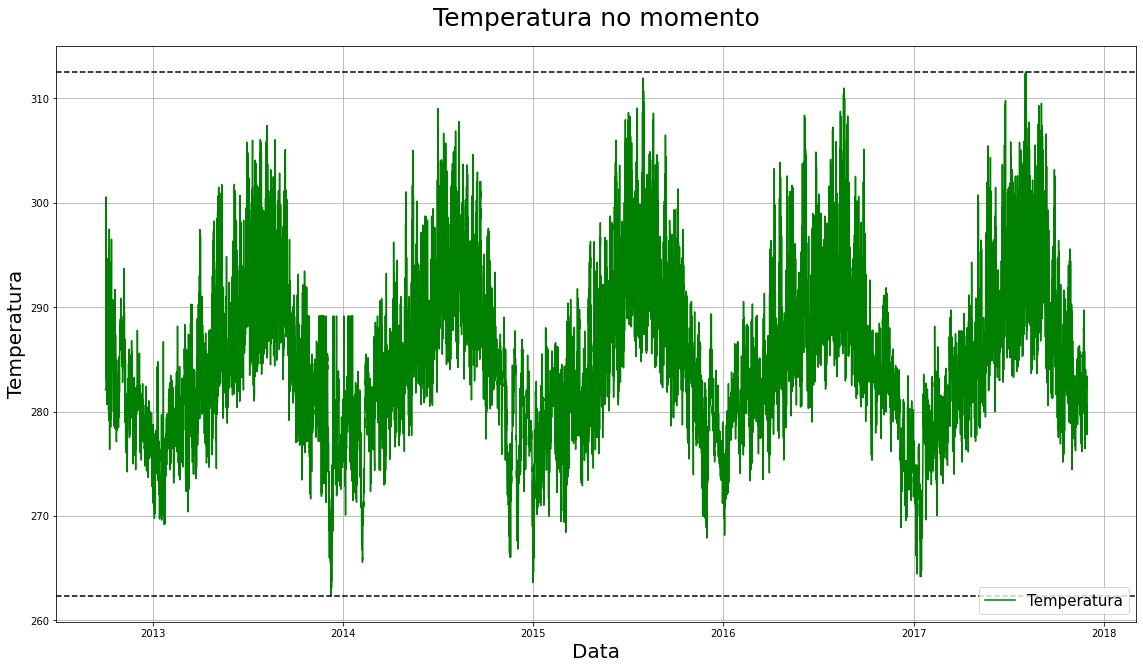

In [34]:
fig = plt.figure(figsize = (15,8))
eixo = fig.add_axes([0,0,1,1])
eixo.plot(df['data'], df['temperatura'], color = 'g')
eixo.set_title('Temperatura no momento', fontsize = 25, pad = 20)
eixo.set_xlabel('Data', fontsize=20)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.legend(['Temperatura'], loc='lower right', fontsize=15)
eixo.grid(True)
eixo.axhline(max(df['temperatura']), color = 'k', linestyle='--')
eixo.axhline(min(df['temperatura']), color = 'k', linestyle='--')
x1 = df['data'][df['temperatura'].idxmax()]
y1 = max(df['temperatura'])

<font color='teal'>De posse desses valores, chamaremos a função eixo.annotate(). Essa função recebe como parâmetros a string que desejamos usar como anotação, nesse caso "Máximo"; um parâmetro xy que recebe os pontos que definem a posição da anotação (x1,y1); e, se assim preferirmos, o tamanho da fonte.

Text(2017-08-04 00:00:00, 312.52, 'Máximo')

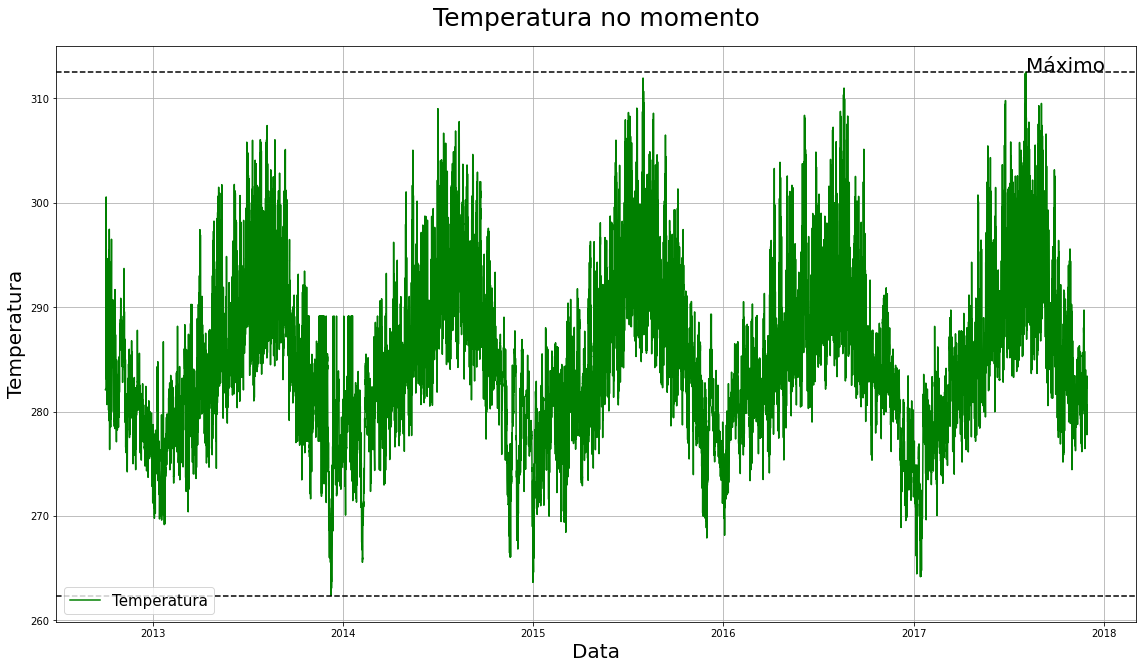

In [35]:
fig = plt.figure(figsize = (15,8))
eixo = fig.add_axes([0,0,1,1])
eixo.plot(df['data'], df['temperatura'], color = 'g')
eixo.set_title('Temperatura no momento', fontsize = 25, pad = 20)
eixo.set_xlabel('Data', fontsize=20)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.legend(['Temperatura'], loc='lower left', fontsize=15)
eixo.grid(True)
eixo.axhline(max(df['temperatura']), color = 'k', linestyle='--')
eixo.axhline(min(df['temperatura']), color = 'k', linestyle='--')
x1 = df['data'][df['temperatura'].idxmax()]
y1 = max(df['temperatura'])
eixo.annotate('Máximo', xy=(x1,y1), fontsize=20)

<font color='teal'> Agora desejamos melhorar a legibilidade dessa visualização. Uma alternativa é deslocarmos o texto "Máximo" para uma posição inferior e utilizarmos uma seta para indicar o ponto a que ele se refere.

Primeiramente, sabemos que nossa seta precisará de um ponto final e de um ponto inicial - ou seja, x1,y1 (o ponto de destino da seta, que já temos) e x2,y2. Queremos que o ponto de origem seja próximo, e, pensando nisso, copiaremos e colaremos as definições de x1 e y1, substituindo a cópia pelas novas variáveis.

Text(2016-10-16 08:00:00, 307.52, 'Máximo')

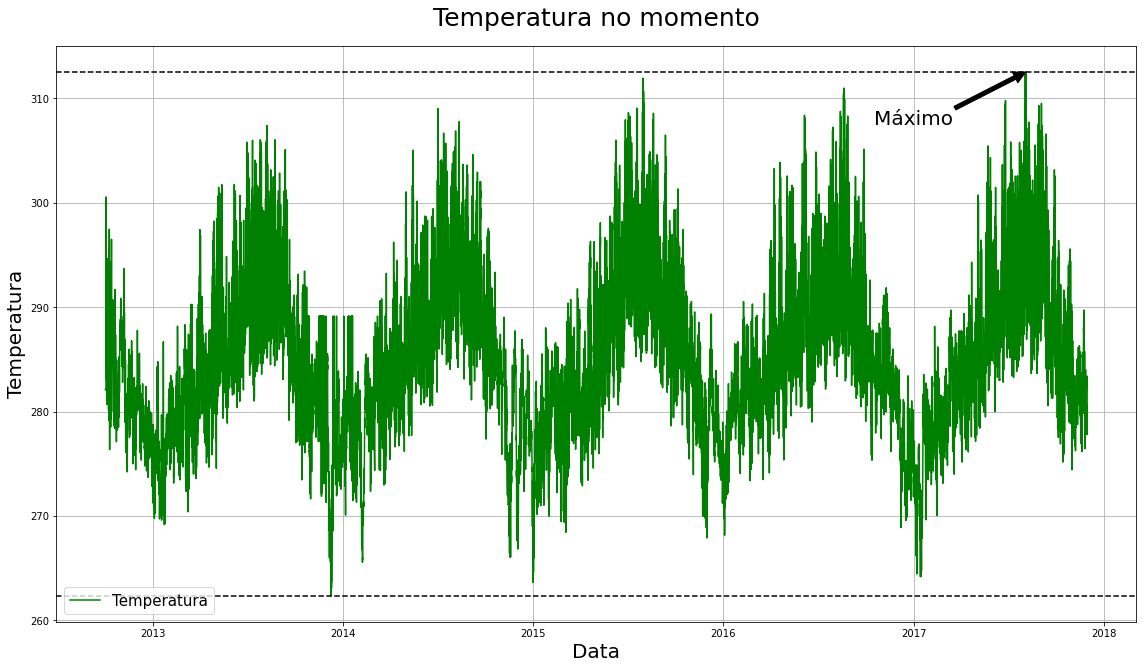

In [36]:
fig = plt.figure(figsize = (15,8))
eixo = fig.add_axes([0,0,1,1])

eixo.plot(df['data'], df['temperatura'], color = 'g')
eixo.set_title('Temperatura no momento', fontsize = 25, pad = 20)
eixo.set_xlabel('Data', fontsize=20)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.legend(['Temperatura'], loc='lower left', fontsize=15)
eixo.grid(True)
eixo.axhline(max(df['temperatura']), color = 'k', linestyle='--')
eixo.axhline(min(df['temperatura']), color = 'k', linestyle='--')

x1 = df['data'][df['temperatura'].idxmax()]
y1 = max(df['temperatura'])

x2 = df['data'][df['temperatura'].idxmax() - 7000]
y2 = max(df['temperatura']) - 5

eixo.annotate('Máximo', xy=(x1,y1), fontsize=20, 
              xytext=(x2,y2), arrowprops=dict(facecolor='k'))

Text(2013-02-19 21:00:00, 267.37, 'Mínimo')

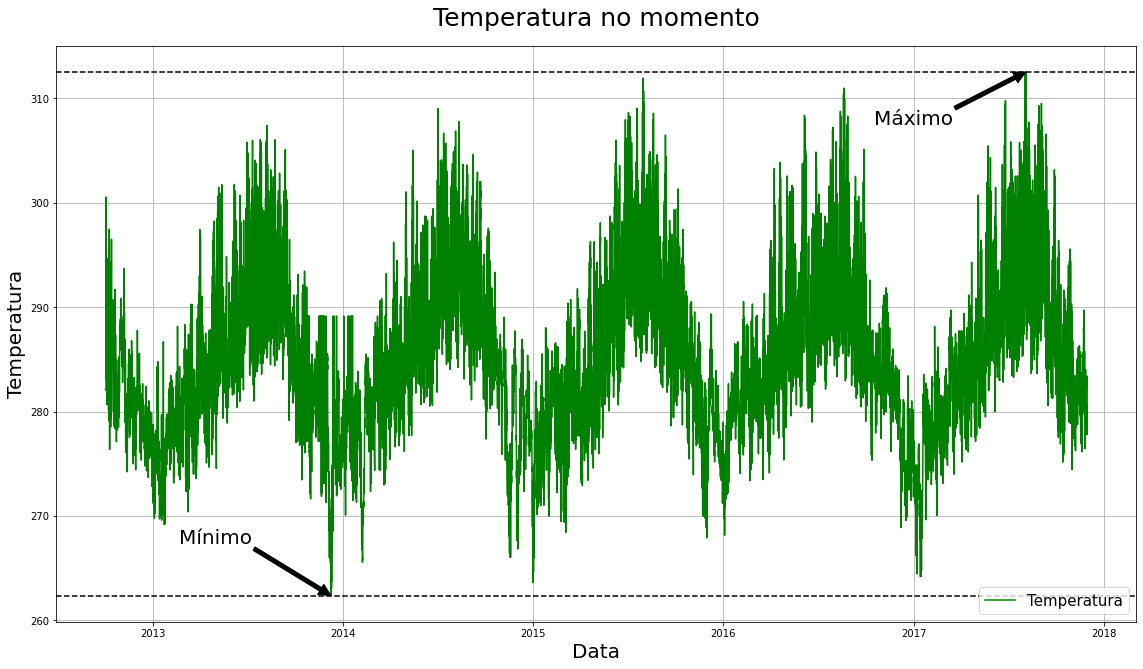

In [37]:
fig = plt.figure(figsize = (15,8))
eixo = fig.add_axes([0,0,1,1])

eixo.plot(df['data'], df['temperatura'], color = 'g')
eixo.set_title('Temperatura no momento', fontsize = 25, pad = 20)
eixo.set_xlabel('Data', fontsize=20)
eixo.set_ylabel('Temperatura', fontsize=20)
eixo.legend(['Temperatura'], loc='lower right', fontsize=15)
eixo.grid(True)
eixo.axhline(max(df['temperatura']), color = 'k', linestyle='--')
eixo.axhline(min(df['temperatura']), color = 'k', linestyle='--')

x1 = df['data'][df['temperatura'].idxmax()]
y1 = max(df['temperatura'])

x2 = df['data'][df['temperatura'].idxmax() - 7000]
y2 = max(df['temperatura']) - 5

eixo.annotate('Máximo', xy=(x1,y1), fontsize=20, 
              xytext=(x2,y2), arrowprops=dict(facecolor='k'))

x1 = df['data'][df['temperatura'].idxmin()]
y1 = min(df['temperatura'])

x2 = df['data'][df['temperatura'].idxmin() - 7000]
y2 = min(df['temperatura']) + 5

eixo.annotate('Mínimo', xy=(x1,y1), fontsize=20, 
              xytext=(x2,y2), arrowprops=dict(facecolor='k'))

<font color='teal'>Temos então uma visualização bastante completa e que traz diversas informações sobre a série histórica de maneira agradável, principalmente a identificação dos pontos máximos e mínimos. No próximo vídeo continuaremos a utilizar os dados do conjunto para gerarmos diferentes visualizações.

<font color='teal'> Nosso objetivo agora será verificar se existem dias da semana que são mais quentes ou mais frios - por exemplo, será que todo domingo é mais quente? Usando o Matplotlib, geraremos alguns gráficos de barras que nos auxiliarão nessa análise.

Começaremos agrupando os nossos dados, e para isso criaremos uma variável temperatura_por_dia_da_semana recebendo df.groupy('dia_da_semana')['temperatura']. Como queremos uma média desses valores, usaremos a função mean().

In [38]:
temperatura_por_dia_da_semana = df.groupby('dia_da_semana')['temperatura'].mean()
temperatura_por_dia_da_semana

dia_da_semana
Domingo    285.009095
Quarta     284.998290
Quinta     285.000643
Segunda    284.985382
Sexta      285.060886
Sábado     285.003316
Terça      284.892811
Name: temperatura, dtype: float64

<font color='teal'>Note que os valores são bem próximos, o que parece derrubar a nossa hipótese. Mesmo assim, prosseguiremos para a criação de um gráfico de barras que represente esses dados. Repare que os dias da semana estão em ordem alfabética, e não na ordem que normalmente se dá a eles, o que pode atrapalhar a interpretação de um gráfico.

Sendo assim, vamos ordená-los manualmente. Criaremos uma variável nome_dias recebendo a lista nome_dias = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']. É necessário escrever os dias da semana exatamente como estão no índice do nosso conjunto, do contrário teremos um erro. Por fim, atribuiremos à variável temperatura_por_dia_da_semana o filtro temperatura_por_dia_da_semana[nome_dias].

In [42]:
temperatura_por_dia_da_semana = df.groupby('dia_da_semana')['temperatura'].mean()
nome_dias = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']
temperatura_por_dia_da_semana = temperatura_por_dia_da_semana[nome_dias]
temperatura_por_dia_da_semana

dia_da_semana
Domingo    285.009095
Segunda    284.985382
Terça      284.892811
Quarta     284.998290
Quinta     285.000643
Sexta      285.060886
Sábado     285.003316
Name: temperatura, dtype: float64

<font color='teal'>Começaremos a criação do gráfico declarando uma figura fig que recebe plt.figure(). Como não precisaremos de uma figura tão grande, passaremos figsize=(5,4) como parâmetro. Criaremos também um eixo a partir de fig.add_axes(), novamente com uma lista de pontos que compreendem o tamanho total do eixo ([0,0,1,1])

<font color='teal'>Para plotarmos um gráfico de barras em nosso eixo, chamaremos a função bar recebendo como parâmetros o indice e o conjunto temperatura_por_dia_da_semana. Em seguida, usaremos eixo.set_title() para definirmos o título, além de ajustarmos o tamanho da fonte e o espaçamento.

Text(0.5, 0, 'Temperatura média')

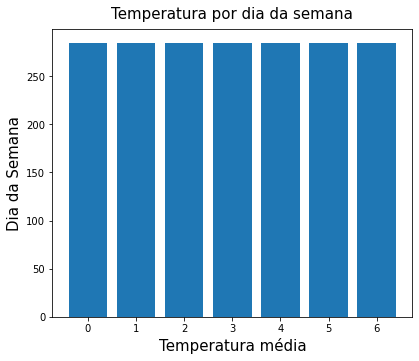

In [45]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1,])
indice = range(len(temperatura_por_dia_da_semana))

eixo.bar(indice, temperatura_por_dia_da_semana)
eixo.set_title('Temperatura por dia da semana', fontsize=15, pad=10)

# Adicionaremos também os rótulos: "Dia da semana" no eixo X, 
# com fontsize=15; e "Temperatura média" no eixo Y, com o mesmo tamanho de fonte.
eixo.set_ylabel('Dia da Semana', fontsize=15)
eixo.set_xlabel('Temperatura média', fontsize=15)

<font color='teal'>No eixo X temos o indice que criamos anteriormente, mas seria mais interessante termos os nomes dos dias da semana. Para isso, usaremos a função eixo.set_xticks() recebendo como parâmetro o indice. Em seguida, usaremos set_xticklabels() para rotularmos os valores de indice com a lista nome_dias.

[Text(0, 0, 'Domingo'),
 Text(0, 0, 'Segunda'),
 Text(0, 0, 'Terça'),
 Text(0, 0, 'Quarta'),
 Text(0, 0, 'Quinta'),
 Text(0, 0, 'Sexta'),
 Text(0, 0, 'Sábado')]

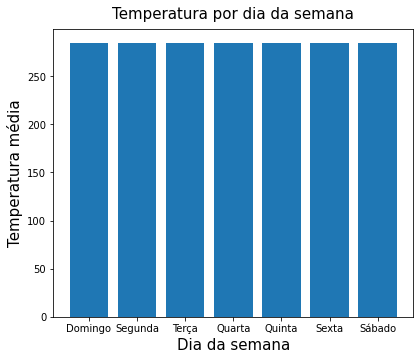

In [46]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
indice = range(len(temperatura_por_dia_da_semana))

eixo.bar(indice, temperatura_por_dia_da_semana)
eixo.set_title('Temperatura por dia da semana', fontsize=15, pad=10)
eixo.set_xlabel('Dia da semana', fontsize=15)
eixo.set_ylabel('Temperatura média', fontsize=15)
eixo.set_xticks(indice)
eixo.set_xticklabels(nome_dias)

[Text(0, 0, 'Domingo'),
 Text(0, 0, 'Segunda'),
 Text(0, 0, 'Terça'),
 Text(0, 0, 'Quarta'),
 Text(0, 0, 'Quinta'),
 Text(0, 0, 'Sexta'),
 Text(0, 0, 'Sábado')]

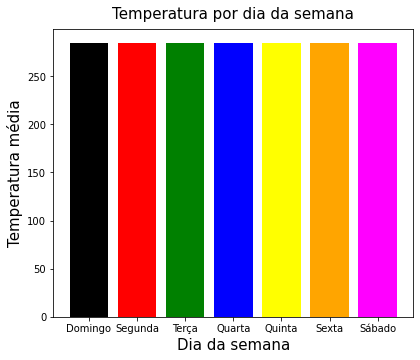

In [47]:
# variando as cores das barras;
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
indice = range(len(temperatura_por_dia_da_semana))
cores = ['black', 'r', 'g', 'b', 'yellow', 'orange', 'magenta']
eixo.bar(indice, temperatura_por_dia_da_semana, color=cores)
eixo.set_title('Temperatura por dia da semana', fontsize=15, pad=10)
eixo.set_xlabel('Dia da semana', fontsize=15)
eixo.set_ylabel('Temperatura média', fontsize=15)
eixo.set_xticks(indice)
eixo.set_xticklabels(nome_dias)

[Text(0, 0, 'Domingo'),
 Text(0, 0, 'Segunda'),
 Text(0, 0, 'Terça'),
 Text(0, 0, 'Quarta'),
 Text(0, 0, 'Quinta'),
 Text(0, 0, 'Sexta'),
 Text(0, 0, 'Sábado')]

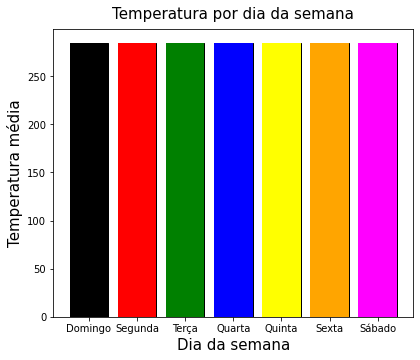

In [48]:
# colocando borda nas barras;
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
indice = range(len(temperatura_por_dia_da_semana))
cores = ['black', 'r', 'g', 'b', 'yellow', 'orange', 'magenta']

eixo.bar(indice, temperatura_por_dia_da_semana, color=cores, edgecolor='black')
eixo.bar(indice, temperatura_por_dia_da_semana, color=cores)
eixo.set_title('Temperatura por dia da semana', fontsize=15, pad=10)
eixo.set_xlabel('Dia da semana', fontsize=15)
eixo.set_ylabel('Temperatura média', fontsize=15)
eixo.set_xticks(indice)
eixo.set_xticklabels(nome_dias)

<font color='teal'>Nossa visualização inicial de temperatura por dias da semana está bastante interessante e com informações bem destacadas. Inclusive, é possível inferirmos visualmente que a temperatura média dos dias da semana é muito próxima. Além do gráfico de barras, existem outros tipos de gráficos que podem ser explorados para visualizarmos tais informações, como o gráfico de pizza.

Como já aprendemos anteriormente, começaremos criando uma figura e traçando seus eixos.
    
Para criarmos um gráfico de pizza, chamaremos a função eixo.pie() passando como parâmetro a temperatura_por_dia_da_semana. Também precisaremos de um rótulo para cada fatia da pizza, algo que definiremos com o argumento labels recebendo o índice do nosso conjunto (temperatura_por_dia_da_semana.index)

Text(0.5, 1.0, 'Temperatura por dia da semana')

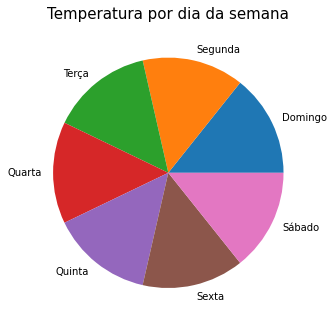

In [50]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
eixo.pie(temperatura_por_dia_da_semana, labels=temperatura_por_dia_da_semana.index)
eixo.set_title('Temperatura por dia da semana', size=15, pad=10) 

<font color='teal'>Seria interessante incluirmos no gráfico a porcentagem de cada dia da semana. Para isso, incluiremos na chamada de eixo.pie() o parâmetro autopct recebendo como valor %.1f$%% (onde .1 significa que teremos apenas uma casa decimal).

Text(0.5, 1.0, 'Temperatura por dia da semana')

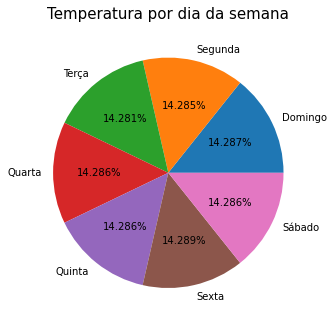

In [53]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
eixo.pie(temperatura_por_dia_da_semana,
         labels=temperatura_por_dia_da_semana.index, autopct='%.3f%%')
eixo.set_title('Temperatura por dia da semana', size=15, pad=10)

<font color='teal'>Temos disponível um recurso interessante que pode nos ajudar a dar ênfase em determinados valores quando assim desejarmos, que consiste em "explodir" algumas fatias da pizza.

Para testarmos esse recurso "explodindo" somente os finais de semana, criaremos a variável explodir recebendo uma lista onde atribuiremos 1 para domingo, sexta e sábado e 0 para os demais dias. Esses valores determinar uma taxa de "explosão" para cada rótulo.

Text(0.5, 1.0, 'Temperatura por dia da semana')

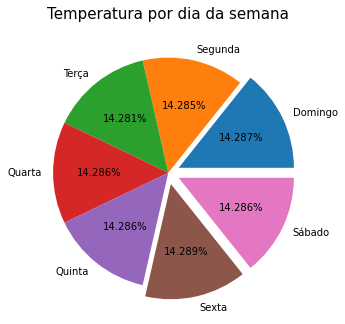

In [56]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
explodir = [0.1, 0, 0, 0, 0, 0.1, 0.1]
eixo.pie(temperatura_por_dia_da_semana,
         labels=temperatura_por_dia_da_semana.index, autopct='%.3f%%', explode=explodir)
eixo.set_title('Temperatura por dia da semana', size=15, pad=10)

Text(0.5, 1.0, 'Temperatura por dia da semana')

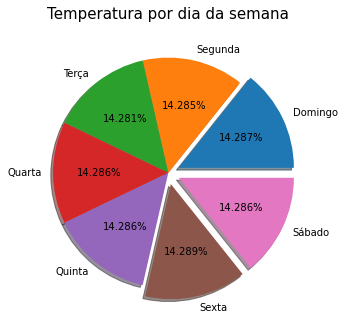

In [57]:
#Também podemos melhorar a aparência do gráfico adicionando uma sombra,
# algo feito usando o parâmetro shadow=True.
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])
explodir = [0.1, 0, 0, 0, 0, 0.1, 0.1]
eixo.pie(temperatura_por_dia_da_semana,
         labels=temperatura_por_dia_da_semana.index, autopct='%.3f%%',
         explode=explodir, shadow=True)
eixo.set_title('Temperatura por dia da semana', size=15, pad=10)

<h1><font color='ff00ff' size=6>Vizualizando dados diferentes

<font color='teal'>UTILIZANDO GRAFICOS DE DISPERSÃO<br>
    Começaremos importando as bibliotecas numpy (com o apelido np), pandas (com o apelido pd) e matplotlib.pyplot (como plt). Caso esteja utilizando o Jupyter, é interessante acrescentar também a instrução %matplotlib inline.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [61]:
df = pd.read_csv('./data/iris.csv')
df.head(5)

comprimento_sépala  largura_sépala  comprimento_pétala  largura_pétala  \
0                 5.1             3.5                 1.4             0.2   
1                 4.9             3.0                 1.4             0.2   
2                 4.7             3.2                 1.3             0.2   
3                 4.6             3.1                 1.5             0.2   
4                 5.0             3.6                 1.4             0.2   

       espécie  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa

<font color='teal'>Nossos dados estão organizados pelo comprimento e largura das sépalas, comprimentoe largura das pétalas e espécie. No conjunto temos três espécies de uma mesma planta: Iris setosa, Iris virginica e Iris versicolor. Para explorarmos essas informações de maneira mais visual, criaremos uma figura fig e declararemos um eixo que será plotado sobre ela.<br><br>
    A ideia é fazermos um gráfico de dispersão para verificarmos o comportamento do comprimento em relação a largura das sépalas das diferentes espécies. Para isso, chamaremos eixo.scatter(), função que gera o gráfico de dispersão, passando como argumentos df['comprimento_sépala'] no eixo X e df['largura_sépala'] no eixo Y. Usando set_title(), atribuiremos o título "Gráfico de dispersão" com tamanho de fonte 25 e espaçamento 15.

Adicionaremos o rótulo do eixo X com set_xlabel() passando a string "Comprimento da sépala" e definindo 15 como o tamanho da fonte. Repetiremos o processo para o eixo Y, dessa vez usando set_ylabel() e passando o texto "Largura da sépala".

Text(0, 0.5, 'Largura da sépala')

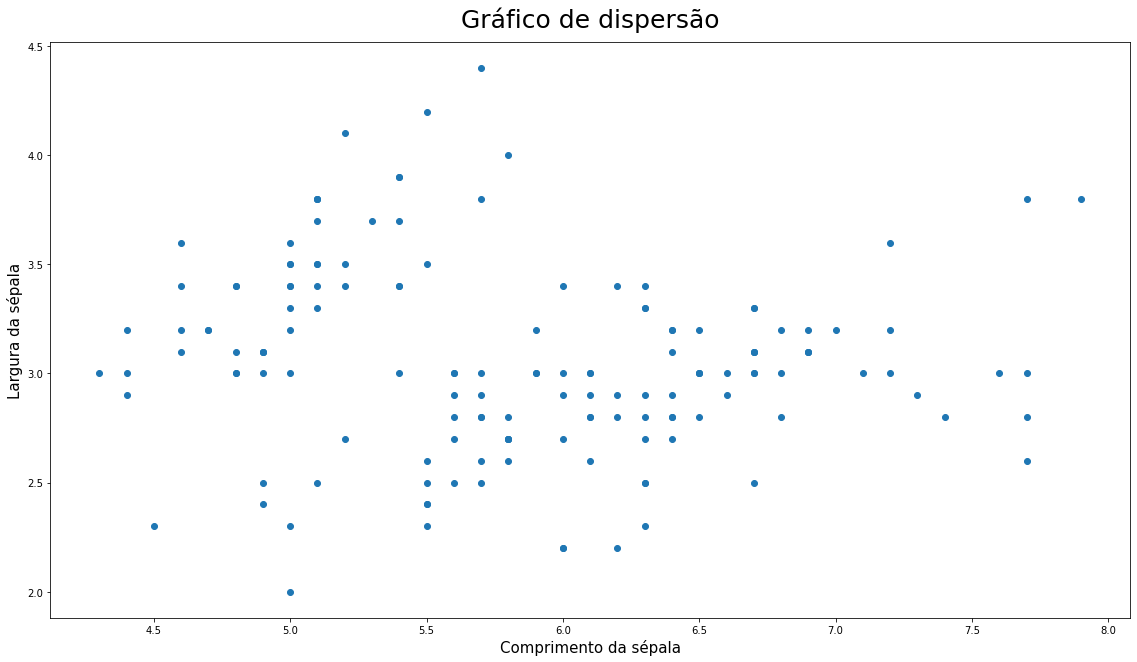

In [64]:
fig = plt.figure(figsize=(15, 8))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.scatter(df.comprimento_sépala, df.largura_sépala)
eixo.set_title('Gráfico de dispersão', fontsize=25, pad=15)
eixo.set_xlabel('Comprimento da sépala', fontsize=15)
eixo.set_ylabel('Largura da sépala', fontsize=15)

<font color='teal'>As gradações de cada um dos eixos, também chamadas de ticks, estão bem pequenas. Para melhorarmos nossa visualização, vamos aumentá-las utilizando eixo.tick_params() e o parâmetro labelsize=25.

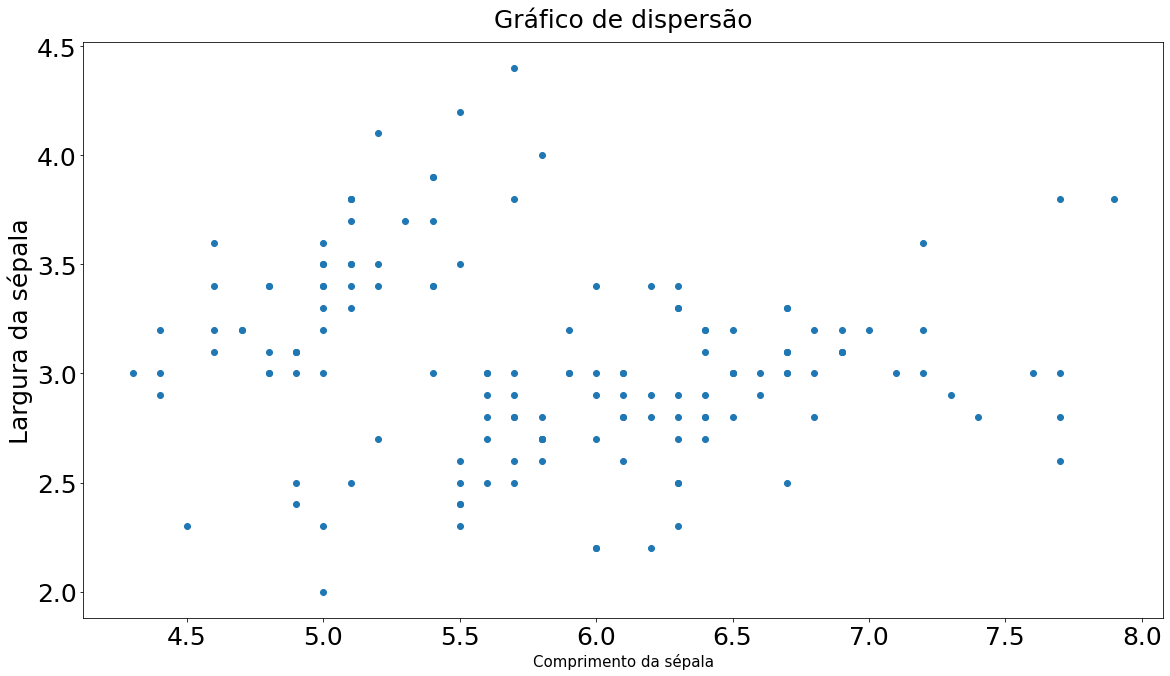

In [66]:
fig = plt.figure(figsize=(15, 8))
eixo = fig.add_axes([0, 0, 1, 1])

eixo.scatter(df.comprimento_sépala, df.largura_sépala)
eixo.set_title('Gráfico de dispersão', fontsize=25, pad=15)
eixo.set_xlabel('Comprimento da sépala', fontsize=15)
eixo.set_ylabel('Largura da sépala', fontsize=25)
eixo.tick_params(labelsize=25)

<font color='teal'>Analisando melhor a dispersão, podemos formular algumas hipóteses. Por exemplo, será temos espécies diferentes sendo plotadas em diferentes pontos do gráfico? Para testarmos essa hipótese, podemos colorir cada uma das espécie em uma cor espécifica.

Até o momento fazíamos esse tipo de configuração utilizando listas, e agora passaremos a usar dicionários. Inicializaremos o dicionário cores recebendo um par de chaves ({}) dentro do qual atribuiremos uma cor a cada espécie: vermelho (r) para "Iris-setosa", azul (b) para "Iris-versicolor" e verde (g) para "Iris-virginica".<br><br>

Nosso objetivo é plotar, em um mesmo eixo, três gráficos de dispersão - um para cada espécie. Sendo assim, criaremos um laço for que iterará por cada especie no conjunto df['espécie']. Como não queremos plotar cada linha, mas sim cada espécie única, adicionaremos a instrução .unique.
    
Dentro desse laço, desejamos selecionar as instâncias que contêm a especie selecionada. Criaremos um dataframe temporário tmp que aplicará um filtro no conjunto df. Tal filtro será uma comparação entre df[df['espécie']] e a especie selecionada no for. Dessa forma, conseguiremos selecionar todos os dados de cada espécie no conjunto.

Em seguida, usaremos eixo.scatter() para plotarmos os dados de comprimento e largura de sépala contidos no dataframe temporário (tmp['comprimento_sépala'] e tmp['largura_sépala'). Por fim, incluiremos na função o parâmetro color recebendo o dicionário cores criado anteriormente, especificando a chave especie.

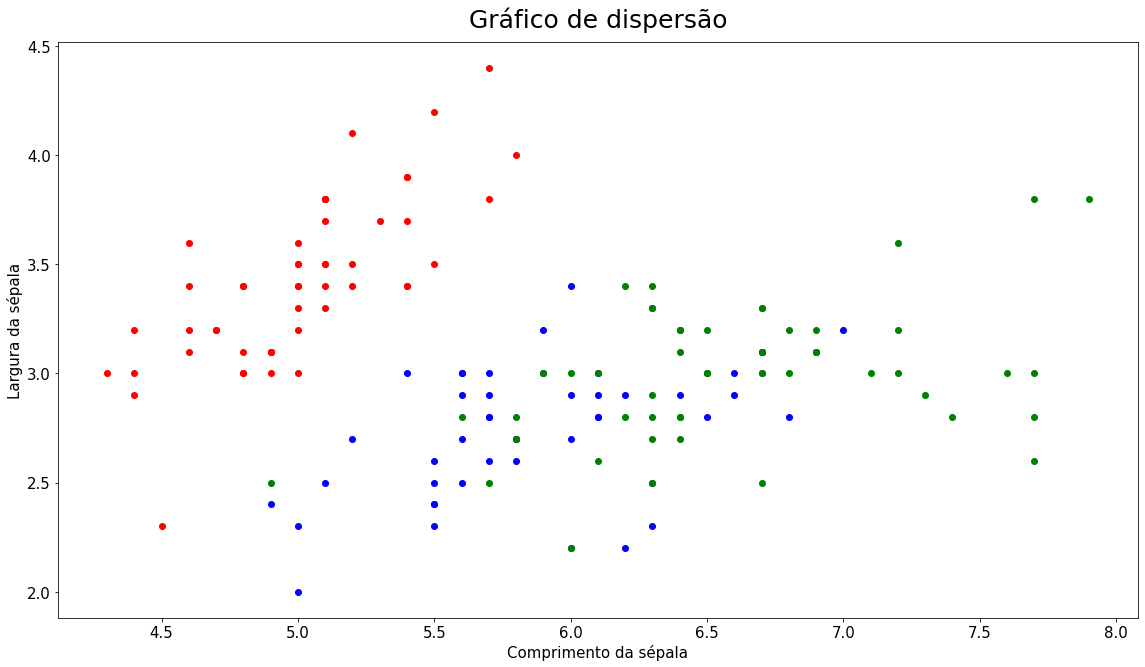

In [68]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])

cores = {'Iris-setosa': 'r', 'Iris-versicolor': 'b', 'Iris-virginica': 'g'}

for especie in df['espécie'].unique():
    tmp = df[df['espécie'] == especie]
    eixo.scatter(tmp['comprimento_sépala'], tmp['largura_sépala'],
                 color=cores[especie])

eixo.set_title('Gráfico de dispersão', fontsize=25, pad=15)
eixo.set_xlabel('Comprimento da sépala', fontsize=15)
eixo.set_ylabel('Largura da sépala', fontsize=15)
eixo.tick_params(labelsize=15)

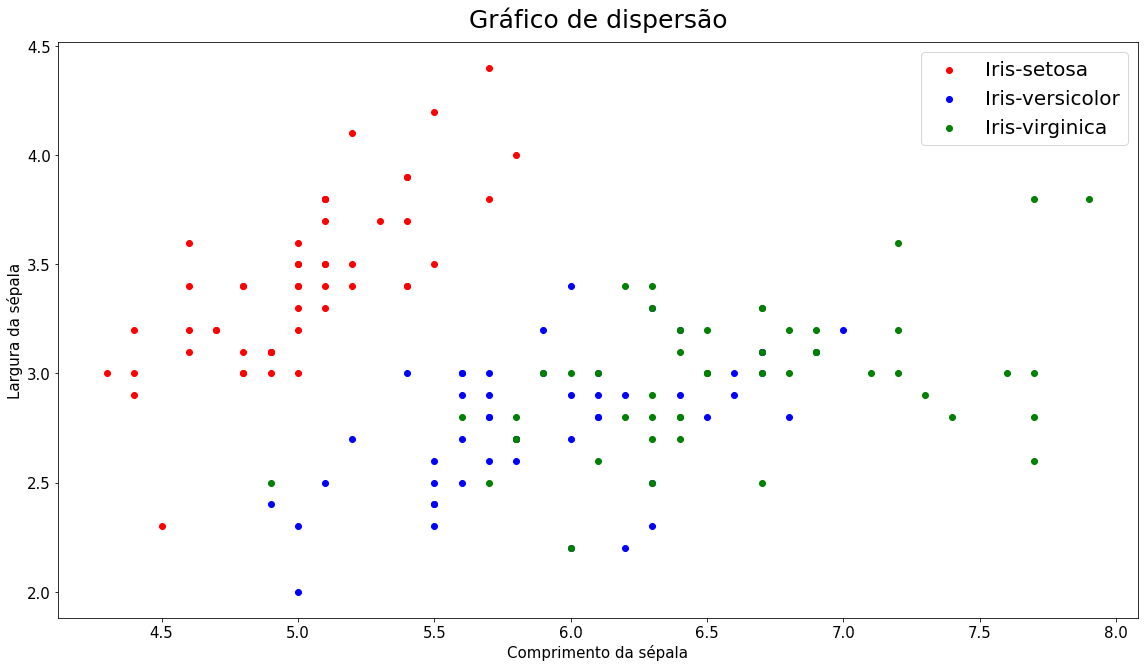

In [69]:
# incluindo legenda ao grafico
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])

cores = {'Iris-setosa': 'r', 'Iris-versicolor': 'b', 'Iris-virginica': 'g'}

for especie in df['espécie'].unique():
    tmp = df[df['espécie'] == especie]
    eixo.scatter(tmp['comprimento_sépala'], tmp['largura_sépala'],
                 color=cores[especie])

eixo.set_title('Gráfico de dispersão', fontsize=25, pad=15)
eixo.set_xlabel('Comprimento da sépala', fontsize=15)
eixo.set_ylabel('Largura da sépala', fontsize=15)
eixo.tick_params(labelsize=15)
eixo.legend(cores, fontsize=20)

<font color='teal'>Outra hipótese que deve ser questionada é a existência de pontos que sobrepõem outros pontos. Uma forma interessante de verificarmos isso é utilizando marcadores, que podem substituir as bolinhas do gráfico por outras figuras, como triângulos ou xis. Criaremos um dicionário marcadores semelhante ao dicionário cores (inclusive com a mesma estrutura), dessa vez atribuindo xis (x) à espécie "Iris setosa", bolinha (o) à "Iris veriscolor" e triângulo (v) para "Iris virginica".

Feito isso, acrescentaremos à função eixo.scatter() um parâmetro marker que receberá como o valor o dicionário marcadores na chave especie.

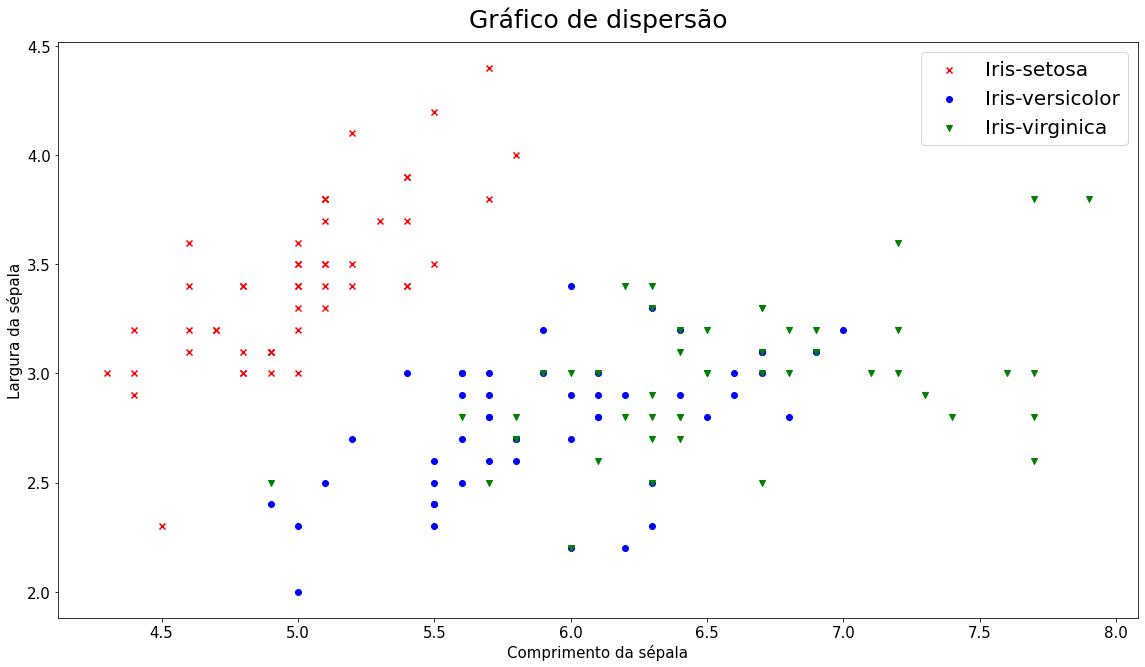

In [72]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])

cores = {'Iris-setosa': 'r', 'Iris-versicolor': 'b', 'Iris-virginica': 'g'}
marcadores = {'Iris-setosa': 'x', 'Iris-versicolor': 'o', 'Iris-virginica': 'v'}


for especie in df['espécie'].unique():
    tmp = df[df['espécie'] == especie]
    eixo.scatter(tmp['comprimento_sépala'], tmp['largura_sépala'],
                 color=cores[especie], marker=marcadores[especie])

eixo.set_title('Gráfico de dispersão', fontsize=25, pad=15)
eixo.set_xlabel('Comprimento da sépala', fontsize=15)
eixo.set_ylabel('Largura da sépala', fontsize=15)
eixo.tick_params(labelsize=15)
eixo.legend(cores, fontsize=20)

<font color='teal'>Tentaremos resolver esse problema aumentando o tamanho dos marcadores. Na função eixo.scatter(), incluiremos um parâmetro s (de size) recebendo o valor 100.

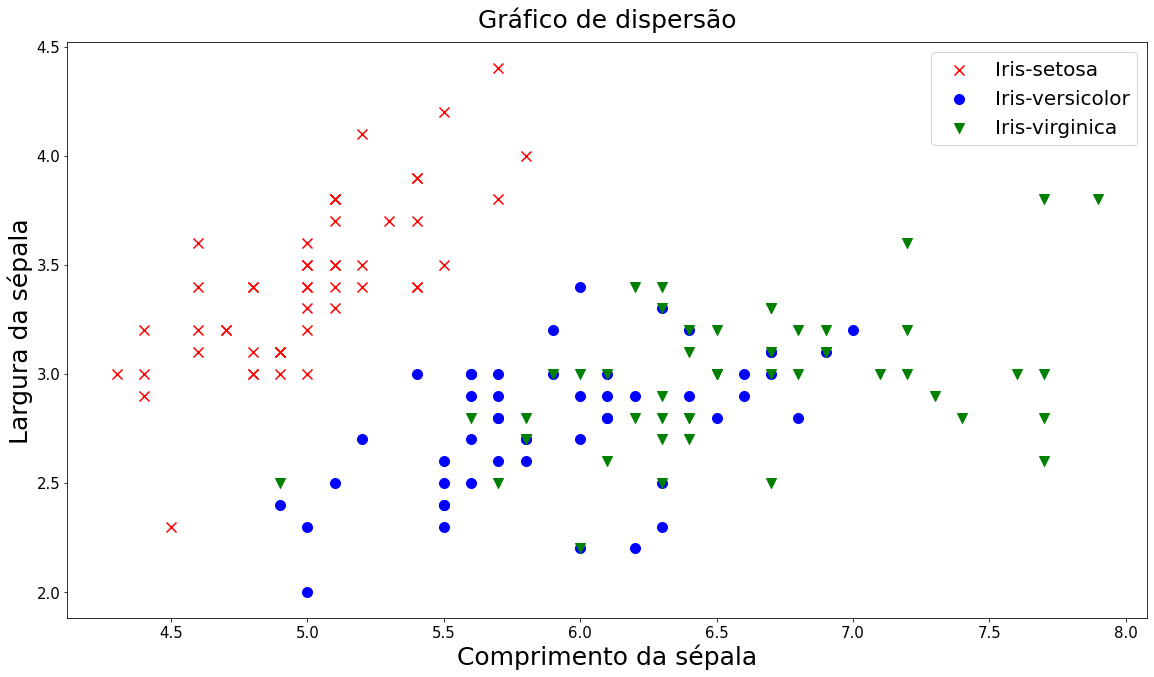

In [77]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])

cores = {'Iris-setosa': 'r', 'Iris-versicolor': 'b', 'Iris-virginica': 'g'}
marcadores = {'Iris-setosa': 'x', 'Iris-versicolor': 'o', 'Iris-virginica': 'v'}


for especie in df['espécie'].unique():
    tmp = df[df['espécie'] == especie]
    eixo.scatter(tmp['comprimento_sépala'], tmp['largura_sépala'],
                 color=cores[especie], marker=marcadores[especie],
                s=100)

eixo.set_title('Gráfico de dispersão', fontsize=25, pad=15)
eixo.set_xlabel('Comprimento da sépala', fontsize=25)
eixo.set_ylabel('Largura da sépala', fontsize=25)
eixo.tick_params(labelsize=15)
eixo.legend(cores, fontsize=20)

In [ ]:
# gerando um boxplot;


[Text(0, 0, 'comprimento_sépala'),
 Text(0, 0, 'largura_sépala'),
 Text(0, 0, 'comprimento_pétala'),
 Text(0, 0, 'largura_pétala')]

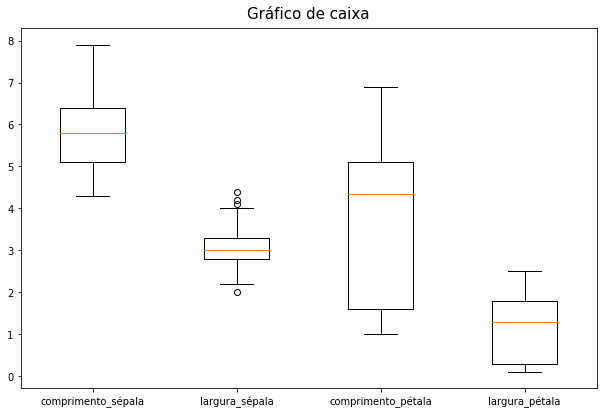

In [78]:
fig = plt.figure(figsize=(8,5))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(df.drop('espécie', axis=1).values)
eixo.set_title('Gráfico de caixa', fontsize=15, pad=10)
eixo.set_xticklabels(df.drop('espécie', axis=1).columns)

[Text(0, 0, 'comprimento_sépala'),
 Text(0, 0, 'largura_sépala'),
 Text(0, 0, 'comprimento_pétala'),
 Text(0, 0, 'largura_pétala')]

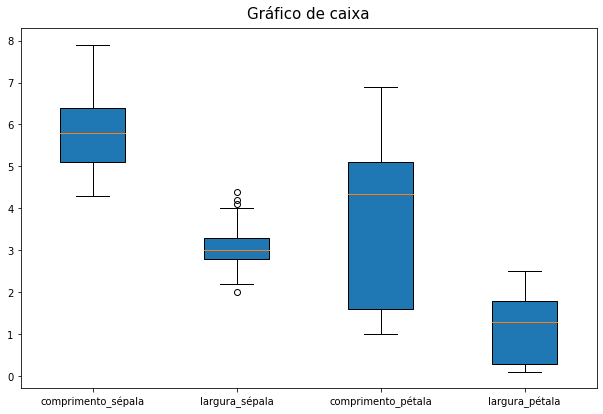

In [79]:
# melhorando o grafico;
fig = plt.figure(figsize=(8,5))
eixo = fig.add_axes([0,0,1,1])

eixo.boxplot(df.drop('espécie', axis=1).values, patch_artist=True)
eixo.set_title('Gráfico de caixa', fontsize=15, pad=10)
eixo.set_xticklabels(df.drop('espécie', axis=1).columns)

<font color='teal'>Seria interessante variarmos as cores desses boxplots. Para isso, criaremos uma lista cores recebendo os valores ['red', 'blue', 'orange', 'green']. Dessa vez não será possível atribuirmos as cores diretamente como fazíamos no gráfico de dispersão. Ao invés disso, precisaremos de um laço que associa cada cor a uma das "caixas".

Sendo assim, chamaremos nosso boxplot de caixas e inicializaremos um laço for que itera por cada caixa e cor encontradas no retorno da função zip´(caixas['boxes'], cores). Essa função nos permite justamente iterar em duas variáveis distintas, ou seja, pelo nosso boxplot caixas (mais especificamente pelas suas boxes) e pela lista cores.<br><br>

Para cada caixa encontrada, chamaremos a função set() ajustando o parâmetro cor para a cor recebida no laço.

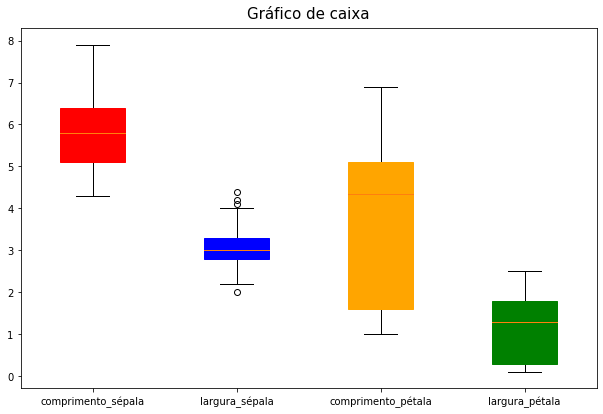

In [80]:
fig = plt.figure(figsize=(8,5))
eixo = fig.add_axes([0,0,1,1])

cores = ['red', 'blue', 'orange', 'green']

caixas = eixo.boxplot(df.drop('espécie', axis=1).values, patch_artist=True)
eixo.set_title('Gráfico de caixa', fontsize=15, pad=10)
eixo.set_xticklabels(df.drop('espécie', axis=1).columns)

for caixa, cor in zip(caixas['boxes'], cores):
    caixa.set(color=cor)

<font color='teal'>Inicializaremos um laço for iterando por cada outlier dentro de caixas['fliers'], onde "fliers" é outro nome dado a esses pontos fora da caixa plotada. A cada outlier encontrado, chamaremos a função set() recebendo o parâmetro marker='x', que alterará sua visualização para um xis. Além disso, passaremos também markersize=8 de modo a aumentarmos o seu tamanho.

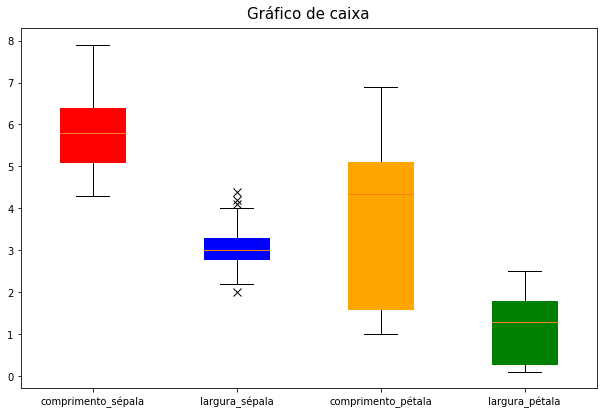

In [81]:
fig = plt.figure(figsize=(8,5))
eixo = fig.add_axes([0,0,1,1])

cores = ['red', 'blue', 'orange', 'green']

caixas = eixo.boxplot(df.drop('espécie', axis=1).values, patch_artist=True)
eixo.set_title('Gráfico de caixa', fontsize=15, pad=10)
eixo.set_xticklabels(df.drop('espécie', axis=1).columns)

for caixa, cor in zip(caixas['boxes'], cores):
    caixa.set(color=cor)

for outlier in caixas['fliers']:
    outlier.set(marker='x', markersize=8)

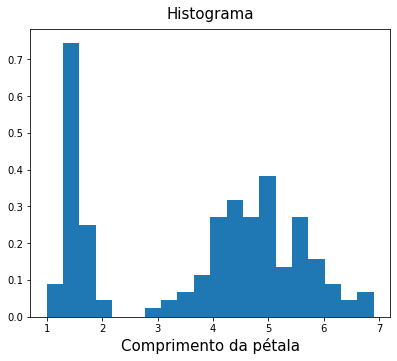

In [86]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(df.comprimento_pétala, bins=20, density=True)
eixo.set_title('Histograma', size=15, pad=10)
eixo.set_xlabel('Comprimento da pétala', size=15)
eixo.grid=True

<h1><font color='ff00ff' size=6>Customizando Histogramas

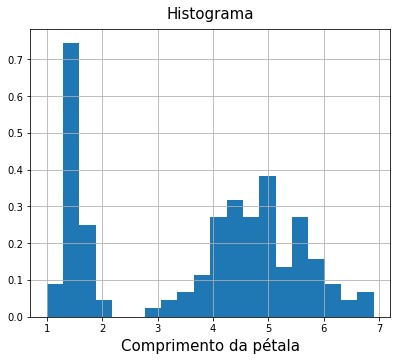

In [87]:
# Começaremos esse processo removendo o atributo density do histograma que criamos anteriormente.
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(df['comprimento_pétala'], bins=20, density=True)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da pétala', fontsize=15)
eixo.grid(True)

<font color='teal'>Em seguida, criaremos as variáveis mu (representando a letra grega μ) e sigma. Elas receberão, respectivamente, o cálculo da média de df['comprimento_pétala'], que conseguiremos com mean(), e o desvio padrão, que conseguiremos com df['comprimento_pétala'].std().<br><br>
    Usaremos a função eixo.annotate() para mostrarmos os novos dados no gráfico. Como estamos trabalhando com uma fórmula do Matplotlib nessa função, passaremos nosso código entre cifrões ($$), a começar pela média (mu) que receberá a formatação {0:.2f} definindo que queremos exibir duas casas decimais. Usaremos \n para pularmos uma linha e, entre um novo par de cifrões, passaremos sigma = {1:.2f}, assim estabelecendo que esse será o próximo valor exibido e que também terá duas casas decimais.

Text(4.5, 20, '$mu = 3.76$\n$sigma = 1.76$')

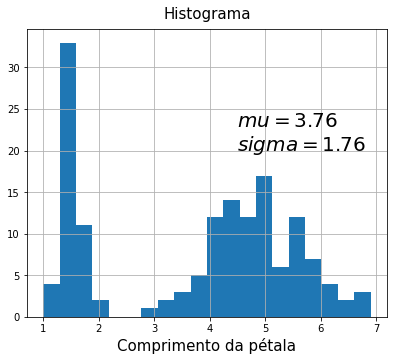

In [88]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

mu, sigma = df['comprimento_pétala'].mean(), df['comprimento_pétala'].std()

eixo.hist(df['comprimento_pétala'], bins=20)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da pétala', fontsize=15)
eixo.grid(True)

eixo.annotate('$mu = {0:.2f}$\n$sigma = {1:.2f}$'.format(mu, sigma),
               xy=(4.5, 20), fontsize=20)

<font color='teal'>Também seria interessante plotarmos no gráfico retas tracejadas que indicassem a média e a mediana. Para desenharmos uma reta na vertical, usaremos a função eixo.axvline() que receberá como argumento a nossa média (mu), uma cor (color = 'k', para definirmos o preto) e um estilo de linha (linestyle = '--').

Além disso, identificaremos que essa reta corresponde à média usando um novo annotate() que receberá o texto "média", a posição xy desse texto (mu-1.3, 28, de forma que o texto seja apresentado à esquerda e acima da anotação anterior) e um tamanho para a fonte.
<br><br>
Na nova chamada de axvline(), passaremos df['comprimento_pétala'].median(), a função responsável por nos retornar a mediana. Em seguida, definiremos a cor como g (verde) e manteremos o mesmo estilo de linha. Já na função annotate(), passaremos o texto "mediana" e o valor df['comprimento_pétala'].median(), 31 como valor de xy, de modo que o texto fique próximo da linha que identifica a mediana. Por fim, manteremos o mesmo tamanho de fonte.

Text(4.35, 31, 'mediana')

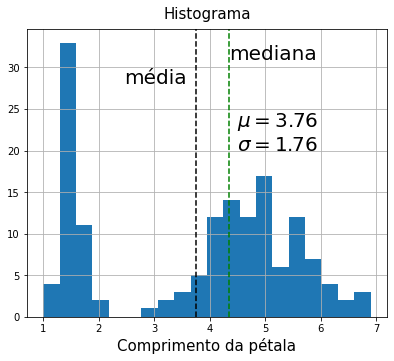

In [89]:

fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

mu, sigma = df['comprimento_pétala'].mean(), df['comprimento_pétala'].std()

eixo.hist(df['comprimento_pétala'], bins=20)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da pétala', fontsize=15)
eixo.grid(True)

eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma),
               xy=(4.5, 20), fontsize=20)

eixo.axvline(mu, color = 'k', linestyle='--')
eixo.annotate('média', xy=(mu-1.3, 28), fontsize=20)

eixo.axvline(df['comprimento_pétala'].median(), color='g', linestyle='--')
eixo.annotate('mediana', xy=(df['comprimento_pétala'].median(), 31), fontsize=20)

<font color='teal'>Nosso objetivo agora é mostrarmos, comparativamente, as distribuições do comprimento de pétala de todas as espécies do nosso conjunto de dados, gerando uma visualização bem interessante que permita, em uma única figura, inferir diversas informações. Começaremos revisitando o código que escreveremos para a distribuição de todas as espécies.

Text(4.35, 31, 'mediana')

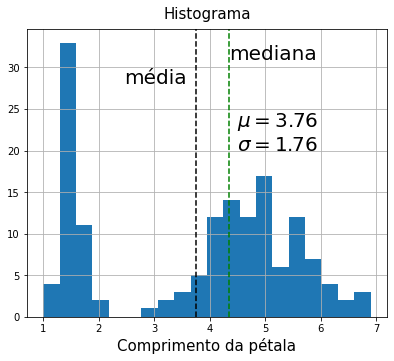

In [90]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

mu, sigma = df['comprimento_pétala'].mean(), df['comprimento_pétala'].std()

eixo.hist(df['comprimento_pétala'], bins=20)
eixo.set_title('Histograma', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da pétala', fontsize=15)
eixo.grid(True)

eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma),
               xy=(4.5, 20), fontsize=20)

eixo.axvline(mu, color = 'k', linestyle='--')
eixo.annotate('média', xy=(mu-1.3, 28), fontsize=20)

eixo.axvline(df['comprimento_pétala'].median(), color='g', linestyle='--')
eixo.annotate('mediana', xy=(df['comprimento_pétala'].median(), 31), fontsize=20)

<font color='teal'>Usaremos a técnica de aplicação de filtros para dividirmos as espécies, começando pela Iris-versicolor. Criaremos uma variável df_iv que receberá df[df['espécie'] == 'Iris-versicolor'] - seja, o conjunto df com um filtro que seleciona apenas os elementos com "Iris-versicolor" na coluna "espécie".

Usaremos essa nova variável para substituir todos os pontos em que anteriormente usávamos o conjunto df original, fazendo com que nossa visualização exibida apenas a Iris versicolor, e aproveitaremos o momento para alterarmos o título do gráfico para "Iris versicolor".
<br><br>
Como a distribuição dos nossos dados no gráfico será diferente, também será necessário movermos nossas anotações de modo que elas não sobreponham outras informações. De antemão, preparamos os valores xy=(4.6, 6) para a primeira chamada de eixo.annotate(), xy=(mu-0.5, 5.5) para a segunda e xy=(df_iv['comprimento_pétala'].median()-0.7, 6.5) para a última. Por fim, para termos uma visualização mais legível, adicionaremos o argumento color = 'g' à última chamada de eixo.annotate(), referente ao rótulo "mediana".

Text(3.6499999999999995, 6.5, 'mediana')

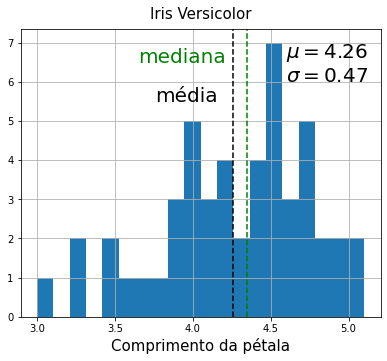

In [91]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

df_iv = df[df['espécie'] == 'Iris-versicolor']

mu, sigma = df_iv['comprimento_pétala'].mean(), df_iv['comprimento_pétala'].std()

eixo.hist(df_iv['comprimento_pétala'], bins=20)
eixo.set_title('Iris Versicolor', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da pétala', fontsize=15)
eixo.grid(True)

eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma),
               xy=(4.6, 6), fontsize=20)

eixo.axvline(mu, color = 'k', linestyle='--')
eixo.annotate('média', xy=(mu-0.5, 5.5), fontsize=20)

eixo.axvline(df_iv['comprimento_pétala'].median(), color='g', linestyle='--')
eixo.annotate('mediana', xy=(df_iv['comprimento_pétala'].median()-0.7, 6.5), fontsize=20,
               color='g')

<font color='teal'>Isso nos retornará uma visualização compreendendo somente os dados da "Iris versicolor", mas também queremos salvá-lo a de alguma forma. Para isso, usaremos a função fig.savefig() que recebe como parâmetro uma string com o nome da imagem resultante, nesse caso histograma_iv.png (sem nos esquecer da extensão da imagem). Também podemos passar um segundo parâmetro bbox_inches='tight' (tight que em inglês significa "justo") de modo a reduzirmos a área branca em volta da figura.

In [92]:
fig.savefig('histograma_iv.png', bbox_inches='tight')

<font color='teal'>Repetiremos todo esse processo para as demais espécies de íris, começando pela "Iris setosa". Faremos as seguintes alterações:
<ul>
<li>substituição do filtro para df_is = df[df['espécie'] == 'Iris-setosa']
<li>substituição das ocorrências de df_iv para df_is
<li>substituição da posição das anotações - xy=(1.7, 7), xy=(mu-0.2, 13.5) e xy=(df_is['comprimento_pétala'].median()+0.05, 12) para cada respectiva chamada de eixo.annotate()
<li>substituição do nome do gráfico para "Iris setosa"
<li>substituição do nome do arquivo gerado para histograma_is.png

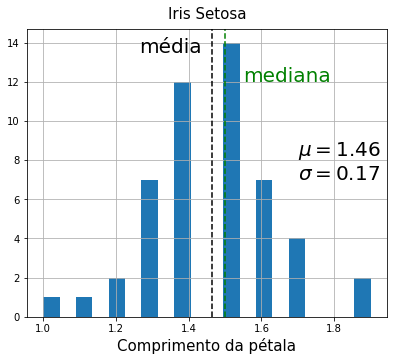

In [93]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

df_is = df[df['espécie'] == 'Iris-setosa']

mu, sigma = df_is['comprimento_pétala'].mean(), df_is['comprimento_pétala'].std()

eixo.hist(df_is['comprimento_pétala'], bins=20)
eixo.set_title('Iris Setosa', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da pétala', fontsize=15)
eixo.grid(True)

eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma),
               xy=(1.7, 7), fontsize=20)

eixo.axvline(mu, color = 'k', linestyle='--')
eixo.annotate('média', xy=(mu-0.2, 13.5), fontsize=20)

eixo.axvline(df_is['comprimento_pétala'].median(), color='g', linestyle='--')
eixo.annotate('mediana', xy=(df_is['comprimento_pétala'].median()+0.05, 12), fontsize=20,
               color='g')

fig.savefig('histograma_is.png', bbox_inches='tight')

<font color='teal'>Por último, faremos as configurações que gerarão o histograma da "Iris virginica":
<ul>
<li>substituição do filtro para df_ivc = df[df['espécie'] == 'Iris-virginica']
<li>substituição das ocorrências de df_iv para df_ivc
<li>substituição da posição das anotações - xy=(6.3, 7), xy=(mu, 8) e xxy=(df_ivc['comprimento_pétala'].median(), 7) para cada respectiva chamada de eixo.annotate()
<li>substituição do nome do gráfico para "Iris virginica"
<li>substituição do nome do arquivo gerado para histograma_ivg.png

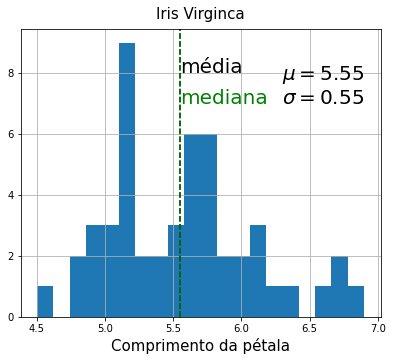

In [94]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

df_ivc = df[df['espécie'] == 'Iris-virginica']

mu, sigma = df_ivc['comprimento_pétala'].mean(), df_ivc['comprimento_pétala'].std()

eixo.hist(df_ivc['comprimento_pétala'], bins=20)
eixo.set_title('Iris Virginca', fontsize=15, pad=10)
eixo.set_xlabel('Comprimento da pétala', fontsize=15)
eixo.grid(True)

eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$'.format(mu, sigma),
               xy=(6.3, 7), fontsize=20)

eixo.axvline(mu, color = 'k', linestyle='--')
eixo.annotate('média', xy=(mu, 8), fontsize=20)

eixo.axvline(df_ivc['comprimento_pétala'].median(), color='g', linestyle='--')
eixo.annotate('mediana', xy=(df_ivc['comprimento_pétala'].median(), 7), fontsize=20,
               color='g')

fig.savefig('histograma_ivg.png', bbox_inches='tight')

<font color='teal'>Com as três visualizações salvas, só nos resta as combinarmos em uma única imagem. Para isso, começaremos importando o objetivo Image da biblioteca PIL, utilizada para manipular imagens.

In [97]:
import PIL

<font color='teal'>Para criarmos uma nova imagem, precisamos definir a sua largura e altura. Criaremos essas variáveis recebendo a chamada de Image.open(), recebendo como parâmetro uma das nossas imagens, por exemplo histograma_ivg.png. Como queremos receber exatamente as duas dimensões, finalizaremos a instrução com .size.

In [98]:
from PIL import Image

largura, altura = Image.open('histograma_ivg.png').size

<font color='teal'>Criaremos uma nova variável, combinada, representando a nossa nova imagem. Ela receberá a chamada de Image.new(), que terá como argumento o tipo da nova imagem (no nosso caso, "RGB") e o seu tamanho: a tupla (3*largura, altura), ou seja, três vezes a largura que recebemos de histograma_ivg.png e a mesma altura.

In [99]:
from PIL import Image

largura, altura = Image.open('histograma_ivg.png').size
combinada = Image.new("RGB", (3*largura, altura))

<font color='teal'>Definiremos uma nova variável intervalo com o valor 0, de modo que a primeira imagem seja posicionada numa posição inicial. Em seguida, criaremos um loop iterando por cada imagem dentro da função map(), que associará o comando de leitura Image.open aos arquivos que desejamos abrir em uma lista, mais especificamente os nossos histogramas.

In [101]:
from PIL import Image

largura, altura = Image.open('histograma_ivg.png').size
combinada = Image.new("RGB", (3*largura, altura))
intervalo = 0
for imagem in map(Image.open, ['histograma_iv.png', 'histograma_is.png',
                               'histograma_ivg.png']):
    combinada.paste(imagem, (intervalo, 0))
    intervalo += largura

combinada.save('combinada.png')

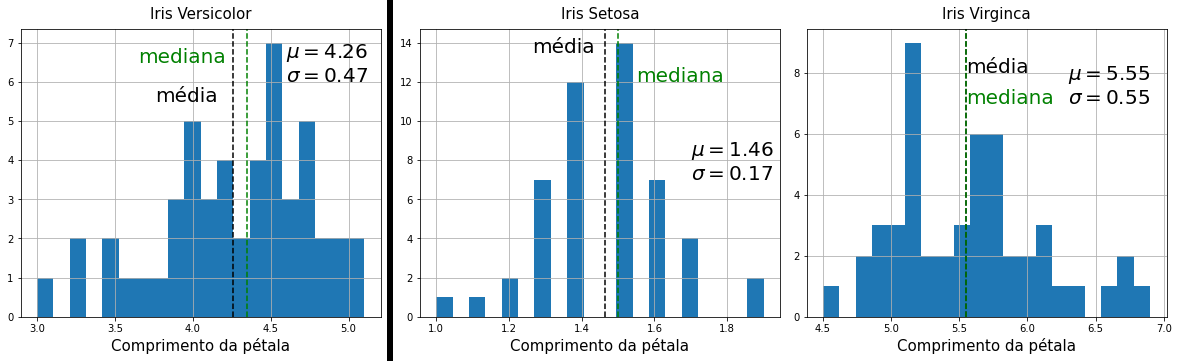

In [102]:
combinada